<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Logo_Bayer.svg/1000px-Logo_Bayer.svg.png" WIDTH=80 ALIGN="right">
</figure>

# Case Study for the job application process for the position as data scientist
*Developed by Erick Hernández*

# Prediction of Applications at MoreJobs4You

The company MoreJobs4You publishes many different job openings online for users of their website to find and to apply for. Users of MoreJobs4You visit the MoreJobs4You website to browse through job openings of many different companies. The job openings were created and published by the respective company. If users find a job opening they like, they may choose to apply for the position directly via MoreJobs4You.

Since business is going well for MoreJobs4You and as they have collected some data on how users behave on their website, the team would now be interested in leveraging their data to further improve their offerings.

One of MoreJobs4You’s product owners has hired you as data science consultant to help the team with this task. To start with, the product owner would like to try whether one can predict whether a given user will not only read a job description, but also apply for it. To explore this question and to build a first prototype, the team provides you with a sample of their (actually much larger) data set.
For a subset of website users, the team provides you with two data sets:

- ***users.csv***: Contains features describing the users. Due to privacy concerns, the names of these features have been anonymized.
- ***job_description.csv***: Contains features describing the job description itself. It only contains those descriptions that have been visited by users contained in users.csv.

The goal of this prototype is to see whether one can predict the binary label has_applied (included in users.csv) which describes whether a user has applied to a given job posting. For that, both datasets may be used.

<table>
    <thead>
        <tr>
            <th>File name</th>
            <th>Field</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=5>users.csv</td>
            <td>user_id</td>
            <td>Unique identifier of the user</td>
        </tr>
        <tr>
            <td>has_applied</td>
            <td>Binary label indicating whether a user has applied to a given job description</td>
        </tr>
        <tr>
            <td>v1</td>
            <td>Anonymized feature number 1</td>
        </tr>
        <tr>
            <td>...</td>
            <td></td>
        </tr>
        <tr>
            <td>v56</td>
            <td>Anonymized feature number 56</td>
        </tr>
        <tr>
            <td rowspan=4>job_descriptions.csv</td>
            <td>job_title_full</td>
            <td>The job title used to describe the position</td>
        </tr>
        <tr>
            <td>salary</td>
            <td>The salary proposed by the company</td>
        </tr>
        <tr>
            <td>company</td>
            <td>The company that published the job description</td>
        </tr>
        <tr>
            <td>user_id</td>
            <td>Unique identifier of the user</td>
        </tr> 
    </tbody>
</table>



Content of this notebook:

- [01 - Importing libraries](#importing-libraries)
- [02 - Importing data](#importing-data)
- [03 - EDA](#eda)
- [04 - Feature engineering](#feature-engineering)
- [05 - Model development](#model-development)
- [06 - Evaluation](#evaluation)
- [07 - Model improvement](#model-improvement)


# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="importing-libraries"></a>  01 - Importing libraries 
###### <p style="background-color:#f5f5f5">&nbsp;</p>


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

import pickle
import re

import math
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('notebook')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore", "depricated")

C:\Users\ErickOziel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ErickOziel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ErickOziel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ErickOziel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="importing-data"></a>02 -  Importing data
###### <p style="background-color:#f5f5f5">&nbsp;</p>

In [2]:
# Read CSV files
df_job_desc = pd.read_csv('job_desc.csv')
df_user = pd.read_csv('user.csv')

In [3]:
# Preview of dataset
df_job_desc.head(3)

,job_title_full,salary,company,user_id
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1
1,Junior Product Manager - Mobile,70000.0,b,U2
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3


In [4]:
# Preview of dataset
df_user.head(3)

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v3,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,NaN,0.631599,0.102101,0.865706,0.394904,0.374307,NaN,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,NaN,0.951785,0.753792,0.951985,0.932224,0.038665,0.291056,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,NaN,0.099396,0.817544,0.078369,0.233120,0.115911,NaN,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,NaN,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669


# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="eda"></a> 03 - Exploratory Data Analysis
###### <p style="background-color:#f5f5f5">&nbsp;</p>

### Analysis of job description table

In [5]:
# Preview of dataset
df_job_desc_orig = df_job_desc.copy()
df_job_desc.head(4)

,job_title_full,salary,company,user_id
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1
1,Junior Product Manager - Mobile,70000.0,b,U2
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4


In [6]:
# Summary
df_job_desc.describe()

,salary
count,613.000000
mean,59980.424144
std,5912.455708
min,50000.000000
25%,55000.000000
50%,60000.000000
75%,65000.000000
max,70000.000000


In [7]:
# Information, e.g. null values and data tpyes
df_job_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job_title_full  2000 non-null   object 
 1   salary          613 non-null    float64
 2   company         2000 non-null   object 
 3   user_id         2000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 62.6+ KB


In [8]:
# Check % of null values
df_job_desc.isnull().mean()*100

job_title_full     0.00
salary            69.35
company            0.00
user_id            0.00
dtype: float64

**Note:** Salary has a high rate of missing values.
    Ideas: Try out binary variable, e.g. salary_shown True|False 

In [9]:
df_job_desc['salary_shown'] = df_job_desc['salary'].apply(lambda x: 1 if x > 0 else 0)
df_job_desc.head(10)

,job_title_full,salary,company,user_id,salary_shown
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1,1
1,Junior Product Manager - Mobile,70000.0,b,U2,1
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3,1
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4,0
4,Online Marketing Manager,64000.0,h,U5,1
5,Marketing Analyst - New Ventures,NaN,g,U6,0
6,Junior Manager Innovation Lab - France (M/F/D),NaN,e,U7,0
7,Lead Growth Hacker - New Ventures,NaN,c,U8,0
8,Senior Sustainability Manager,NaN,d,U9,0
9,Lead Data Analyst - Pricing Team (m/f/d),NaN,f,U10,0


In [10]:
# Check uniqueness of variables
df_job_desc.nunique()/len(df_job_desc)

job_title_full    0.0780
salary            0.0105
company           0.0040
user_id           1.0000
salary_shown      0.0010
dtype: float64

#### Variable "Companies"

In [11]:
companies = df_job_desc['company'].unique().tolist()
companies.sort()
print(companies)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


In [12]:
df_companies = pd.DataFrame(df_job_desc.groupby(['company']).agg(positions=('user_id','count'))).reset_index()
df_companies.head(10)

,company,positions
0,a,240
1,b,256
2,c,235
3,d,287
4,e,257
5,f,246
6,g,231
7,h,248


In [13]:
# Percentage
df = df_companies.copy()
df_rel = df['positions'].div(df['positions'].sum(), 0)*100
df_rel.head(10)

0    12.00
1    12.80
2    11.75
3    14.35
4    12.85
5    12.30
6    11.55
7    12.40
Name: positions, dtype: float64

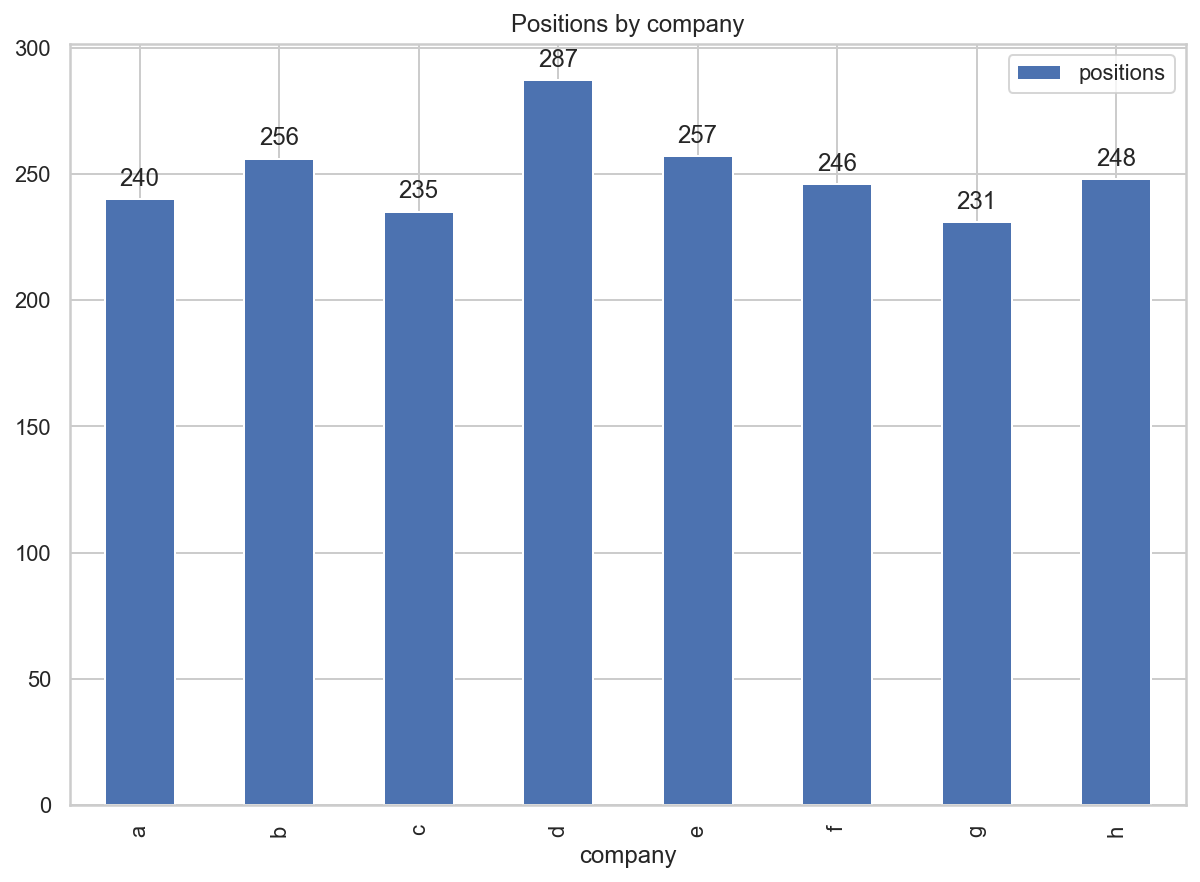

In [14]:
# Plot companies
df = df_companies[['company', 'positions']].copy()
ax = df.plot(x = 'company', kind='bar', stacked = False, title = 'Positions by company', mark_right = True, figsize=(10, 7))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [15]:
# Get K-1 dummies for companies
df_dummies = pd.get_dummies(data=df_job_desc['company'], prefix= 'company', drop_first=True)
df_dummies.head()
df_job_desc = pd.concat( [df_job_desc, df_dummies], axis = 1)
df_job_desc.head(3)

,job_title_full,salary,company,user_id,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1,1,0,0,0,0,0,1,0
1,Junior Product Manager - Mobile,70000.0,b,U2,1,1,0,0,0,0,0,0
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3,1,0,0,0,0,0,1,0


#### Variable "Job Titles"

In [16]:
job_titles = df_job_desc['job_title_full'].unique().tolist()
print("\n- " + "\n- ".join(job_titles[:20]) + "\n...")


- Junior Manager Innovation Lab - France (M/F/D)
- Junior Product Manager -  Mobile
- Junior Brand Marketing Manager - Mobile (M/F/D)
-  Product Analyst - Pricing & Forecasting (M/F/D)
-  Online Marketing Manager
-  Marketing Analyst - New Ventures 
- Lead Growth Hacker - New Ventures 
- Senior Sustainability Manager
- Lead Data Analyst - Pricing Team (m/f/d)
- Senior Product Owner - NLP
- Lead Backend Engineer - Deep Learning
- Junior UI Designer - (Remote)
-  Marketing Manager - (Remote) m/f/d
- Lead Data Consultant - Supplier Financing m/f/d
-  Brand Marketing Manager - (Remote)
-  SEO Marketing Manager m/f/d
- Senior Marketing Manager - New Ventures 
- Senior Growth Marketing Manager - (Remote)
- Junior Operations Manager - New Ventures
- Senior AI Researcher - NLP m/f/d
...


In [17]:
df_job_desc['title_length'] = pd.Series(data=df_job_desc['job_title_full'].str.len(), name="title_length")
df_job_desc['title_length'].describe()

count    2000.000000
mean       37.048000
std         8.471398
min        18.000000
25%        31.000000
50%        37.000000
75%        44.000000
max        56.000000
Name: title_length, dtype: float64

Text(0.5, 1.0, 'Length distribution')

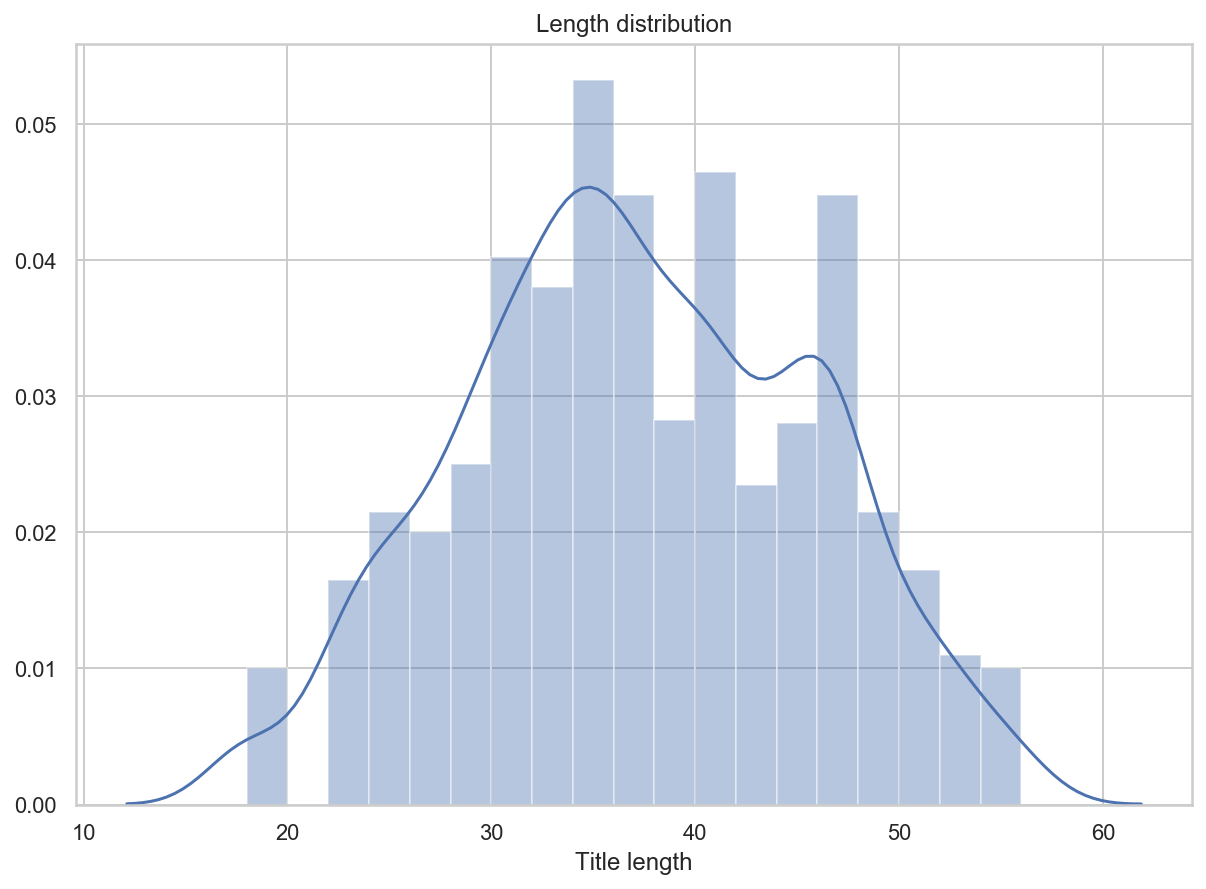

In [18]:
plt.figure(figsize=(10, 7))
sns.distplot(df_job_desc['title_length'], axlabel='Title length').set_title('Length distribution')

In [19]:
df_job_desc['title_length'].describe()

count    2000.000000
mean       37.048000
std         8.471398
min        18.000000
25%        31.000000
50%        37.000000
75%        44.000000
max        56.000000
Name: title_length, dtype: float64

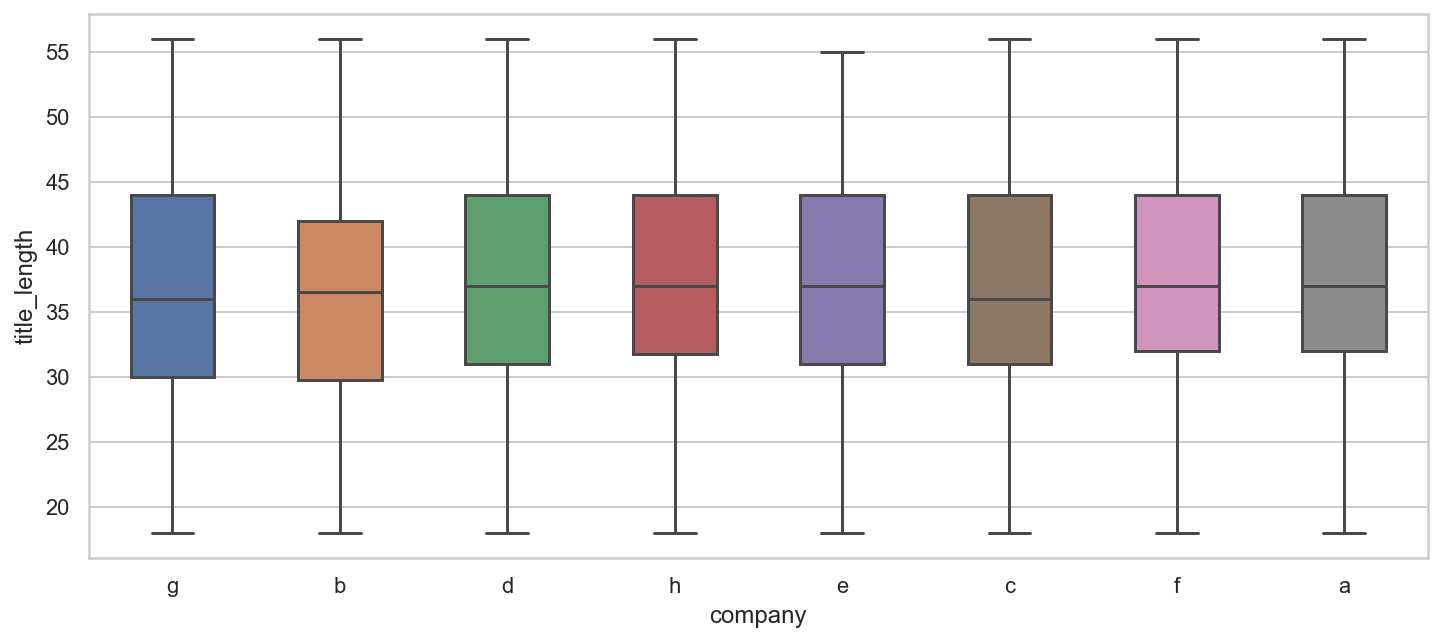

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_job_desc, x='company', y='title_length', width=.5);

In [21]:
def get_seniority(x = ""): 
    x = str(x)
    if re.search('(?i)junior', x):
        return "junior"
    elif re.search("(?i)junior|senior|lead", x) == None:
        return "mid-senior"
    elif re.search('(?i)senior', x):
        return "senior"
    elif re.search('(?i)lead', x):
        return "lead"
    else:
        return "NA"

In [22]:
df_job_desc['seniority'] = df_job_desc['job_title_full'].apply(lambda x: get_seniority(x))
df_job_desc.head(10)

,job_title_full,salary,company,user_id,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority
0,Junior Manager Innovation Lab - France (M/F/D),51000.0,g,U1,1,0,0,0,0,0,1,0,46,junior
1,Junior Product Manager - Mobile,70000.0,b,U2,1,1,0,0,0,0,0,0,32,junior
2,Junior Brand Marketing Manager - Mobile (M/F/D),59000.0,g,U3,1,0,0,0,0,0,1,0,47,junior
3,Product Analyst - Pricing & Forecasting (M/F/D),NaN,d,U4,0,0,0,1,0,0,0,0,48,mid-senior
4,Online Marketing Manager,64000.0,h,U5,1,0,0,0,0,0,0,1,25,mid-senior
5,Marketing Analyst - New Ventures,NaN,g,U6,0,0,0,0,0,0,1,0,34,mid-senior
6,Junior Manager Innovation Lab - France (M/F/D),NaN,e,U7,0,0,0,0,1,0,0,0,46,junior
7,Lead Growth Hacker - New Ventures,NaN,c,U8,0,0,1,0,0,0,0,0,34,lead
8,Senior Sustainability Manager,NaN,d,U9,0,0,0,1,0,0,0,0,29,senior
9,Lead Data Analyst - Pricing Team (m/f/d),NaN,f,U10,0,0,0,0,0,1,0,0,40,lead


In [23]:
df_seniority = pd.DataFrame(df_job_desc.groupby(['company','seniority']).agg(count=('user_id','count'))).reset_index()
df_seniority.head(10)

,company,seniority,count
0,a,junior,69
1,a,lead,55
2,a,mid-senior,61
3,a,senior,55
4,b,junior,69
5,b,lead,63
6,b,mid-senior,66
7,b,senior,58
8,c,junior,70
9,c,lead,51


In [24]:
df_seniority_pivot = df_seniority.pivot(index='company', columns='seniority', values='count').reset_index()
df_seniority_pivot['total_positions'] = df_seniority_pivot['junior'] + df_seniority_pivot['mid-senior']  + df_seniority_pivot['senior'] + df_seniority_pivot['lead'] 
df_seniority_pivot.head(10)

seniority,company,junior,lead,mid-senior,senior,total_positions
0,a,69,55,61,55,240
1,b,69,63,66,58,256
2,c,70,51,53,61,235
3,d,68,78,67,74,287
4,e,66,60,69,62,257
5,f,59,64,51,72,246
6,g,49,64,58,60,231
7,h,67,46,66,69,248


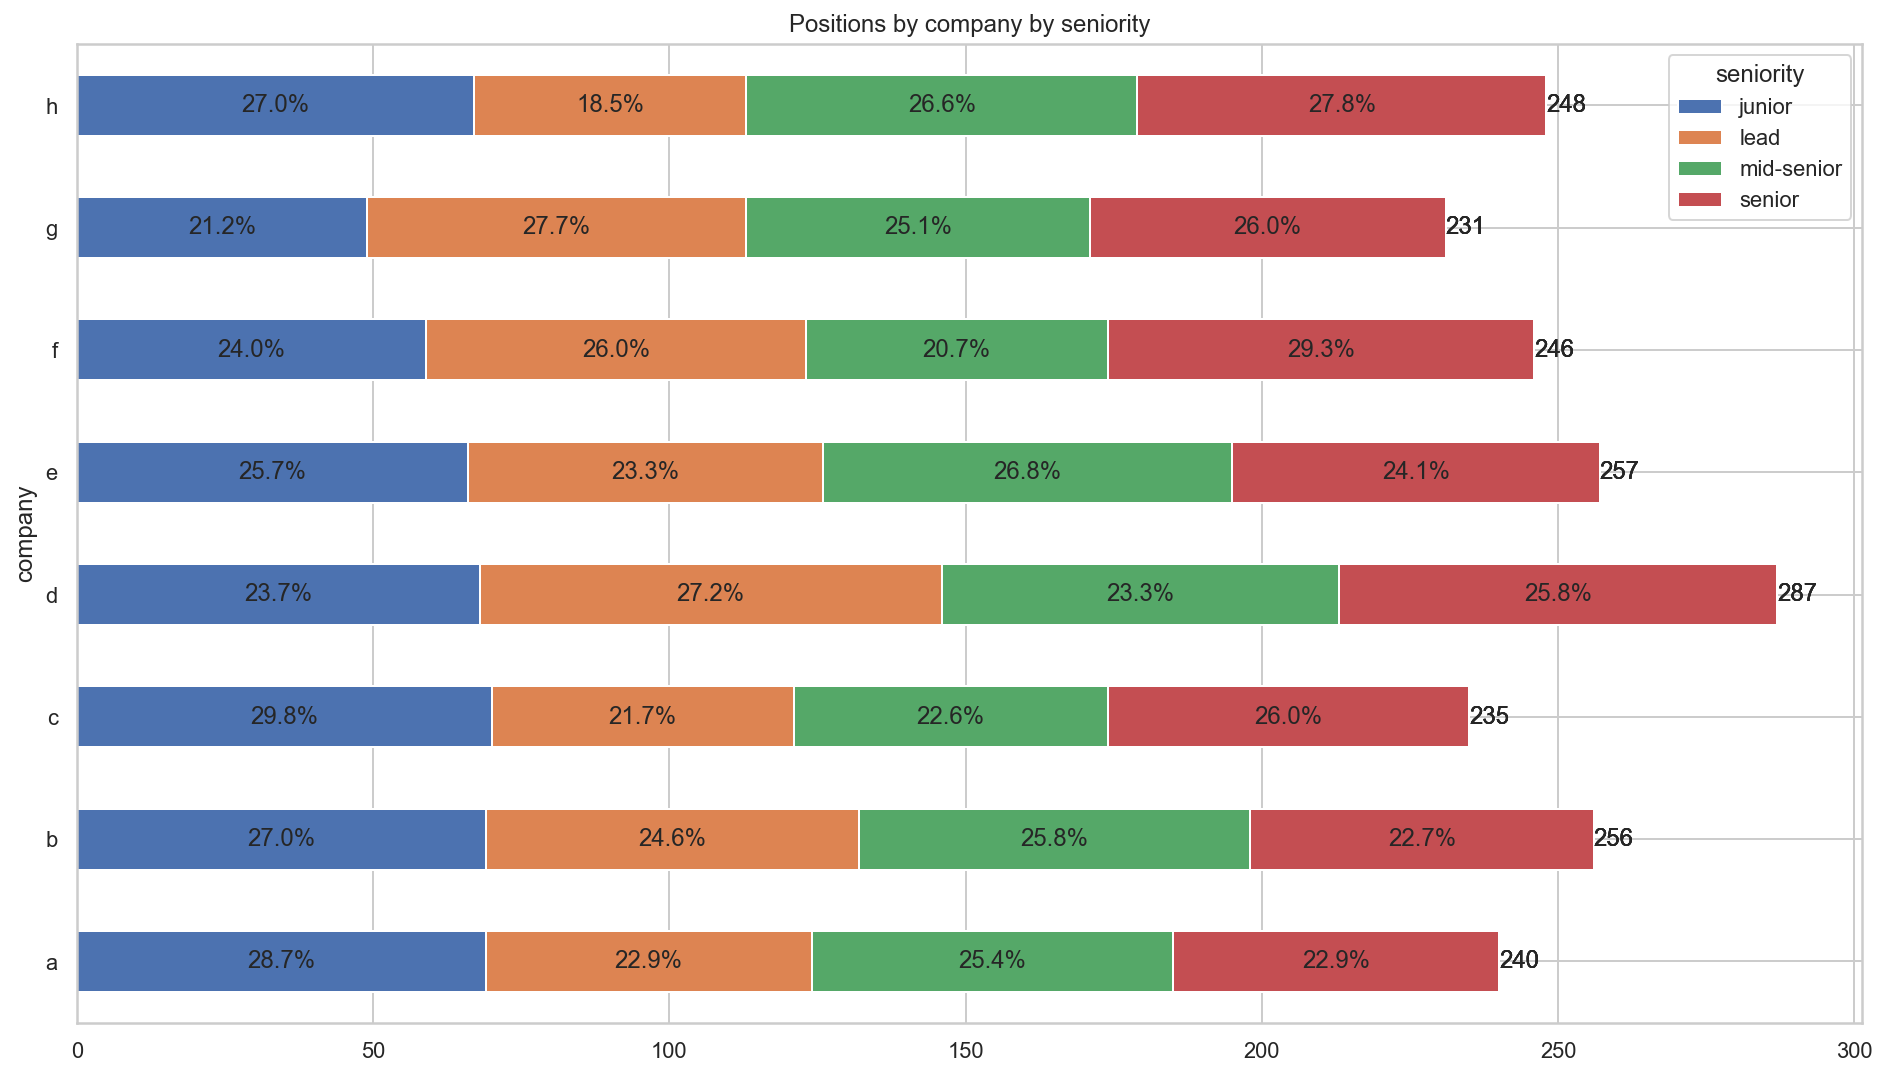

In [25]:
df = df_seniority_pivot.drop(columns=['total_positions'])
df_total = df_seniority_pivot['total_positions']
idx_factor = 1
df.plot(x = 'company', kind='barh',stacked = True, title = 'Positions by company by seniority', mark_right = True, figsize=(16, 9))

df_pct = df[df.columns[1:]].div(df_total, 0)*100

for n in df_pct:
    for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_pct[n], df_total)):
        plt.text(tot , i, str(tot), va='center')
        plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')

**Note:** Good balance. 

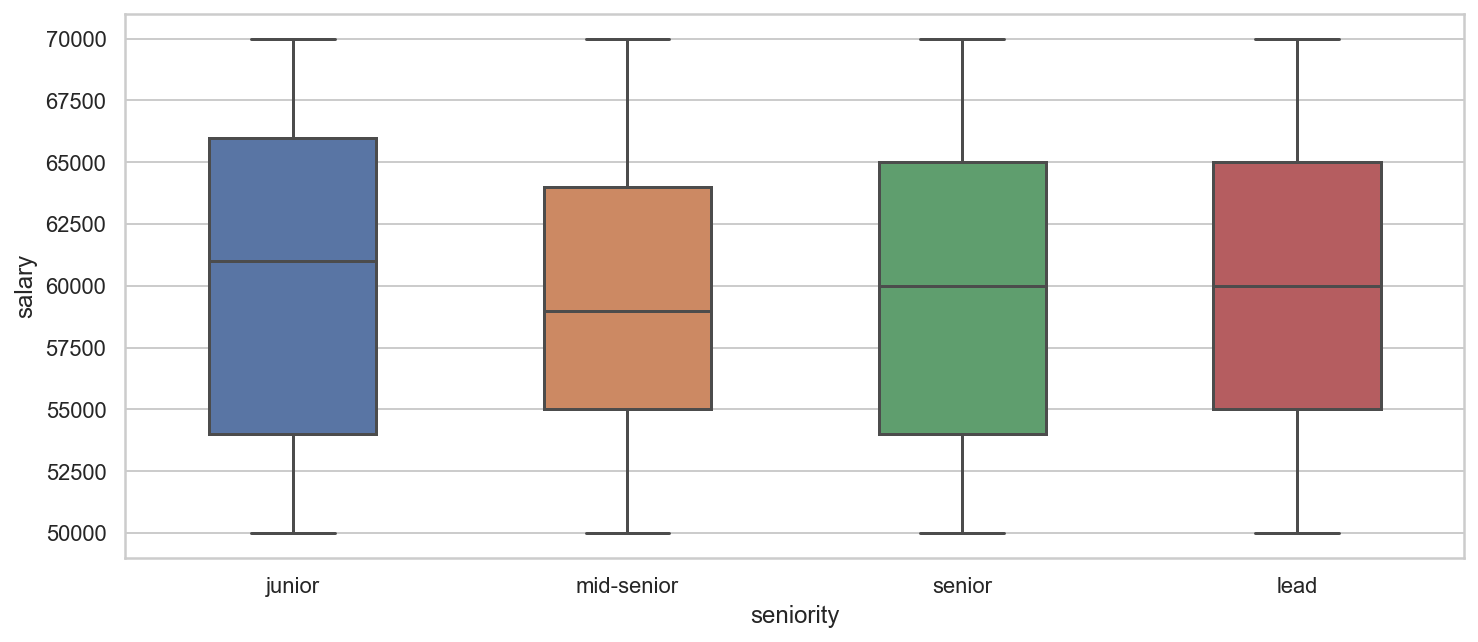

In [26]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_job_desc, x='seniority', y='salary', width=.5, order=['junior', 'mid-senior', 'senior', 'lead'])

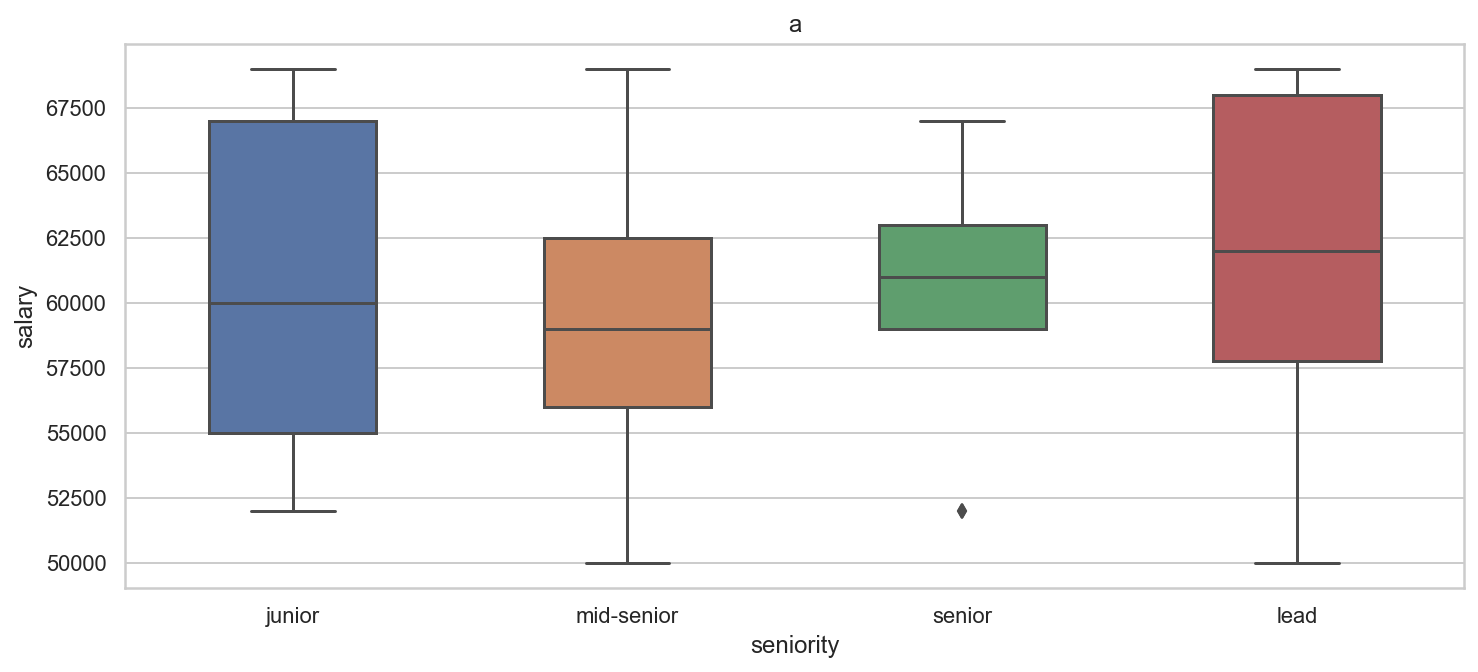

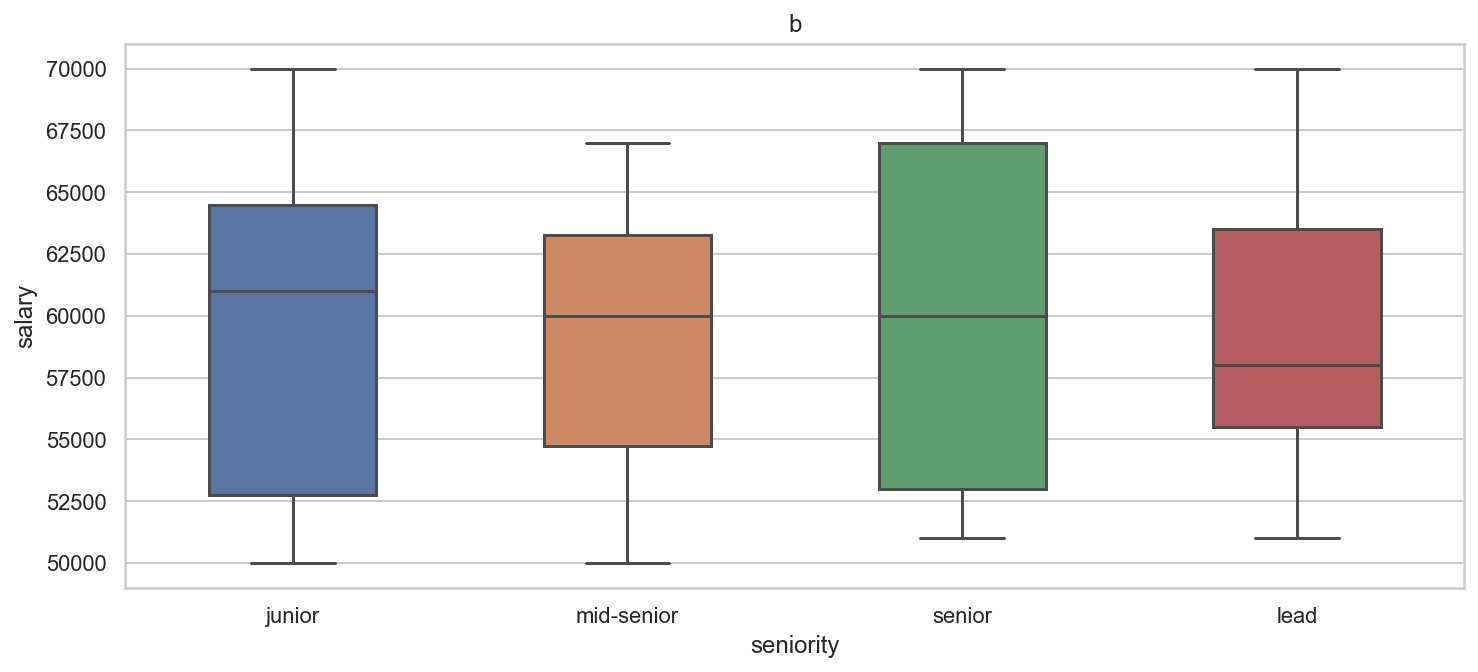

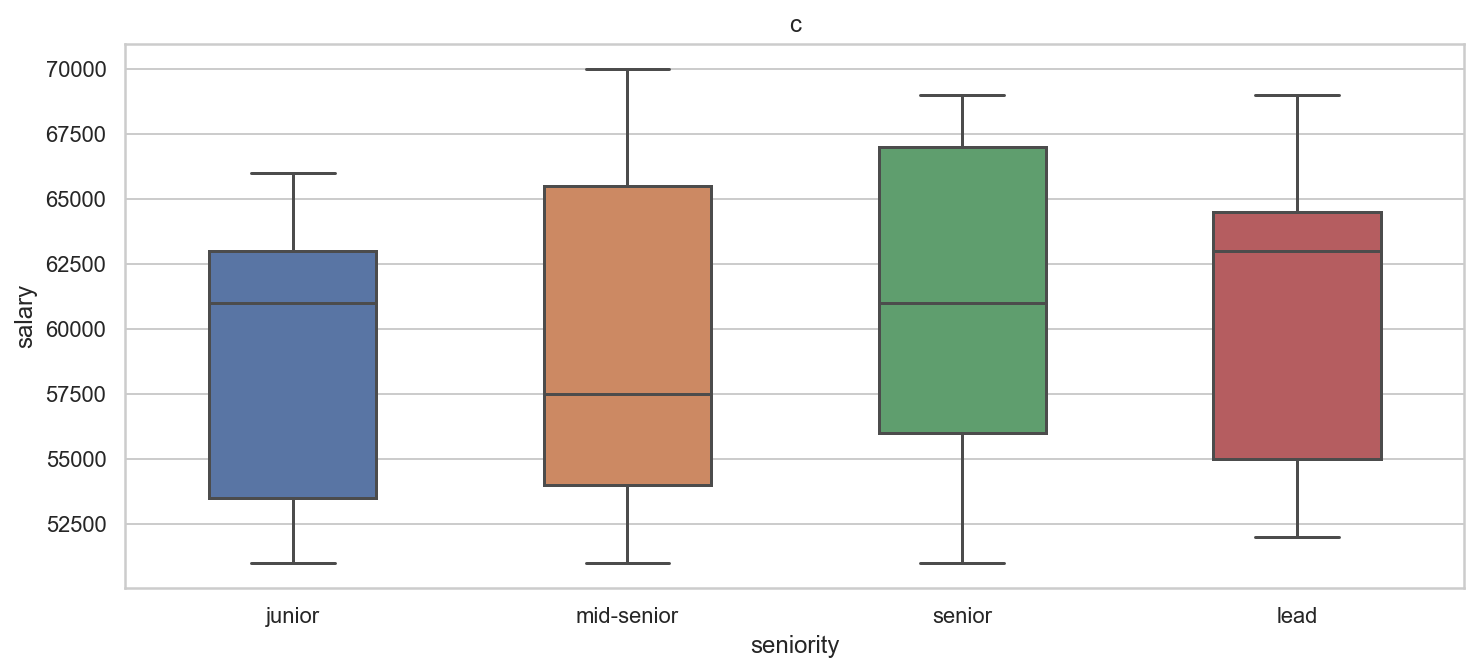

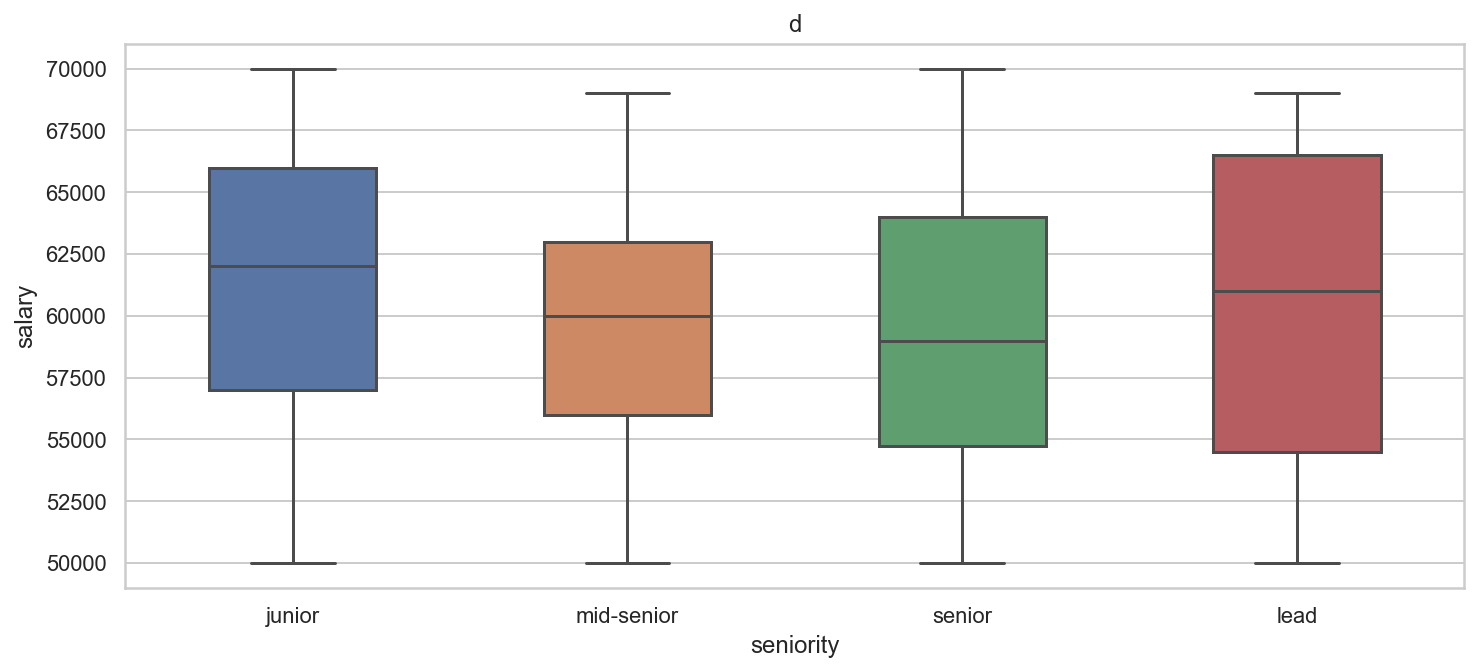

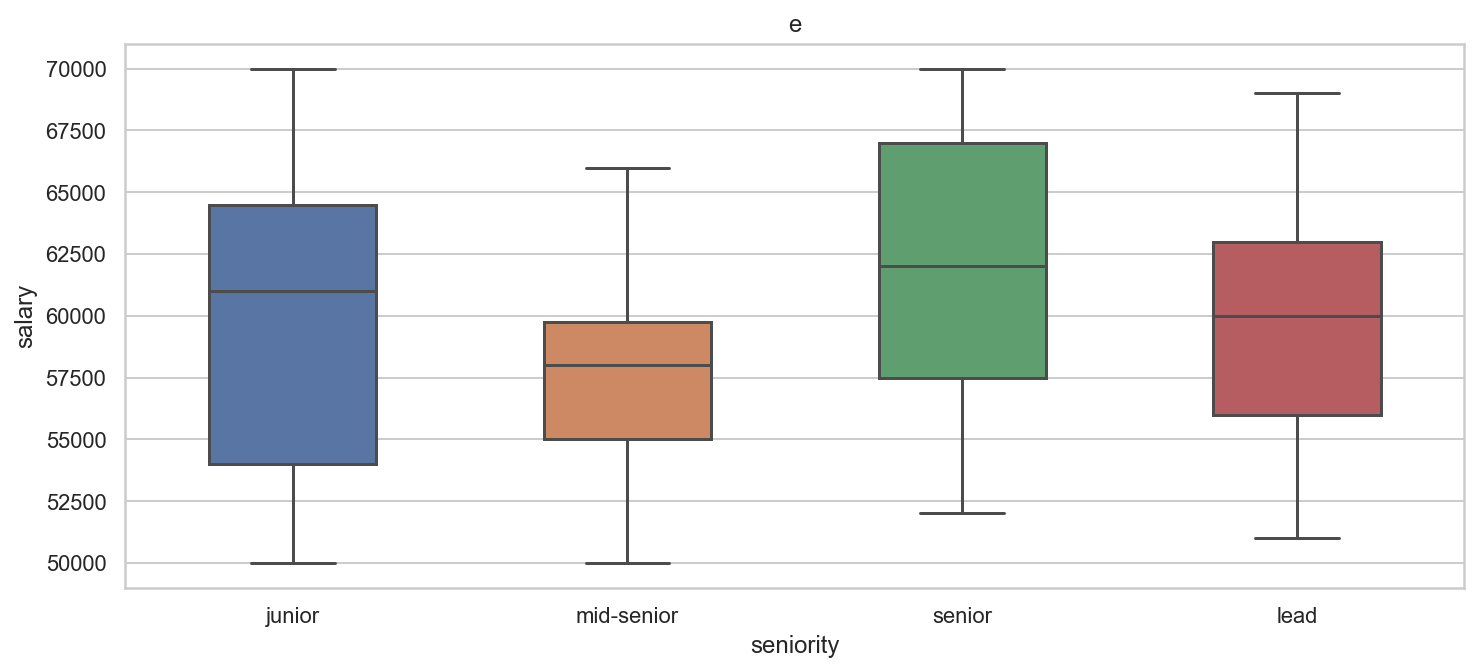

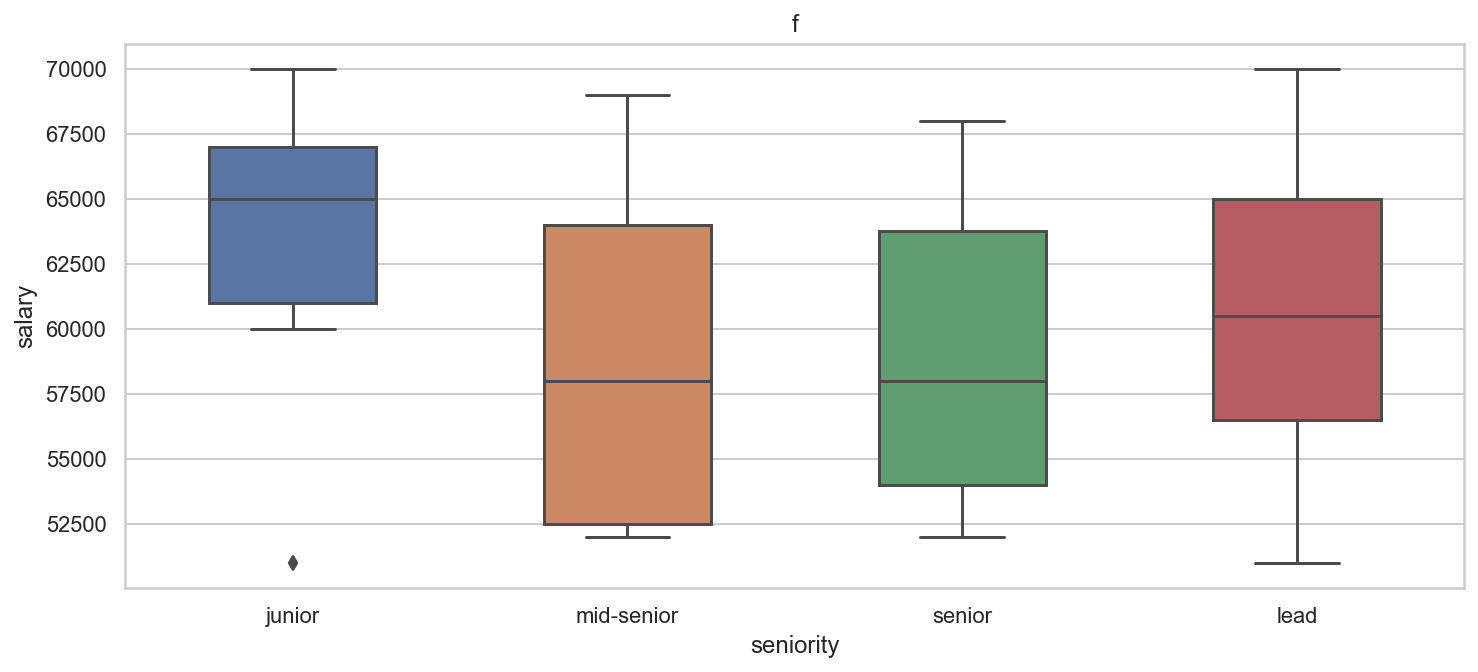

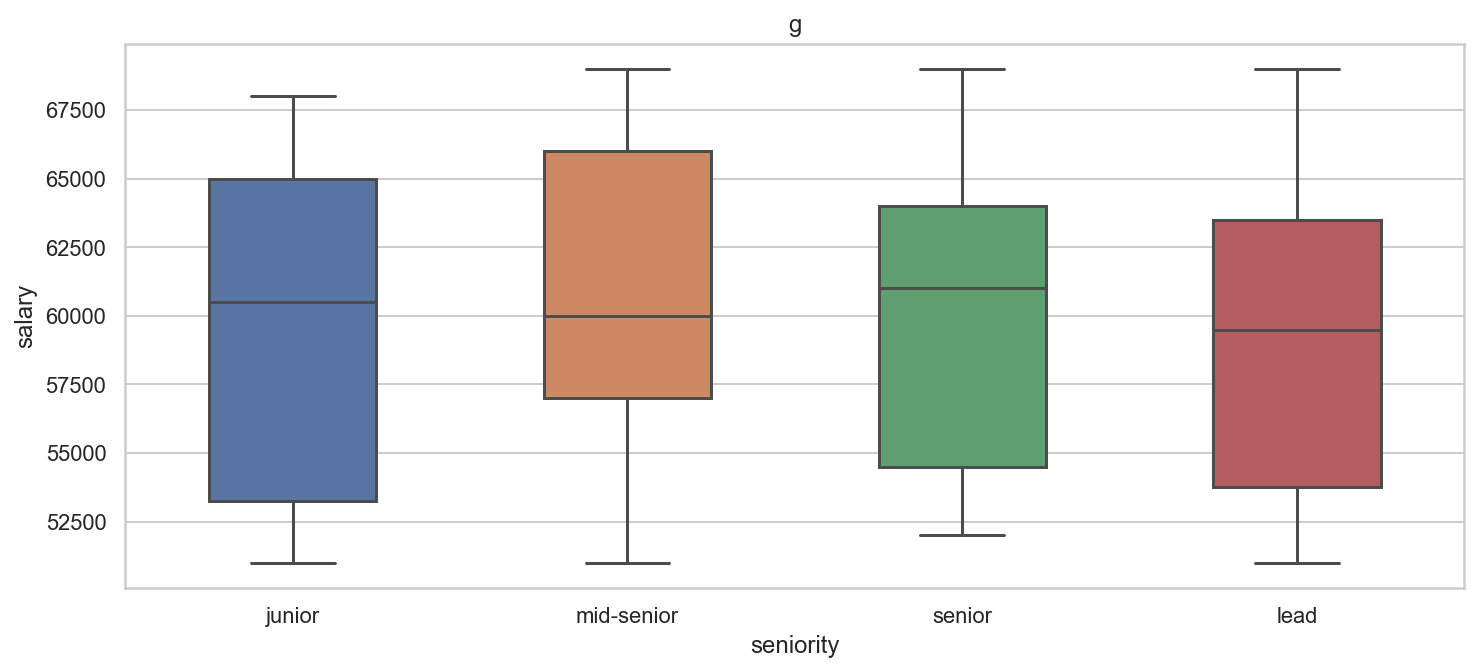

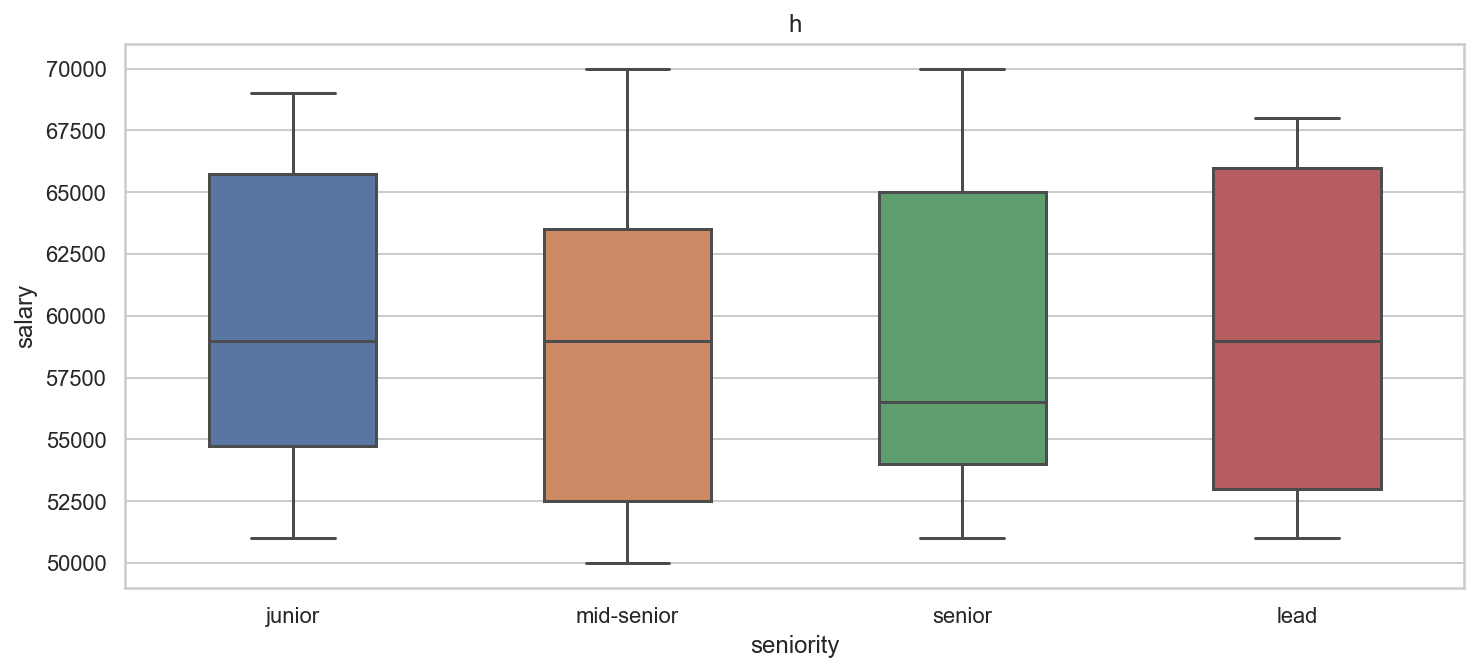

In [27]:
for company in companies:
    plt.figure(figsize=(12, 5))
    plt.title(company)
    sns.boxplot(data=df_job_desc[df_job_desc['company'] == company], x='seniority', y='salary', width=.5, order=['junior', 'mid-senior', 'senior', 'lead'])
    plt.show()

**Note:** Salaries don't necessarily go incrementaly from junior to lead positions. I am removing it, since there are a lot of NaN values and we already have the "salary_shown" variable.

In [28]:
df_job_desc.drop(columns=['salary'], inplace=True)
df_job_desc.columns

Index(['job_title_full', 'company', 'user_id', 'salary_shown', 'company_b',
       'company_c', 'company_d', 'company_e', 'company_f', 'company_g',
       'company_h', 'title_length', 'seniority'],
      dtype='object')

In [29]:
# Get K-1 dummies for seniority
df_dummies = pd.get_dummies(data=df_job_desc['seniority'], prefix= 'seniority', drop_first=True)
df_dummies.head()

,seniority_lead,seniority_mid-senior,seniority_senior
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [30]:
df_job_desc = pd.concat( [df_job_desc, df_dummies], axis = 1)
df_job_desc.head(3)

,job_title_full,company,user_id,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority,seniority_lead,seniority_mid-senior,seniority_senior
0,Junior Manager Innovation Lab - France (M/F/D),g,U1,1,0,0,0,0,0,1,0,46,junior,0,0,0
1,Junior Product Manager - Mobile,b,U2,1,1,0,0,0,0,0,0,32,junior,0,0,0
2,Junior Brand Marketing Manager - Mobile (M/F/D),g,U3,1,0,0,0,0,0,1,0,47,junior,0,0,0


In [31]:
df_job_desc.drop(columns=['company', 'seniority'], inplace=True)
df_job_desc.head(3)

,job_title_full,user_id,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior
0,Junior Manager Innovation Lab - France (M/F/D),U1,1,0,0,0,0,0,1,0,46,0,0,0
1,Junior Product Manager - Mobile,U2,1,1,0,0,0,0,0,0,32,0,0,0
2,Junior Brand Marketing Manager - Mobile (M/F/D),U3,1,0,0,0,0,0,1,0,47,0,0,0


### Analysis of user table

In [32]:
df_user.head(3)

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v3,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,NaN,0.631599,0.102101,0.865706,0.394904,0.374307,NaN,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,NaN,0.951785,0.753792,0.951985,0.932224,0.038665,0.291056,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,NaN,0.099396,0.817544,0.078369,0.233120,0.115911,NaN,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,NaN,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669


In [33]:
df_user.describe()

,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v3,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
count,2000.000000,1973.000000,1954.000000,1952.000000,1951.000000,1962.000000,1958.000000,1950.000000,1956.000000,1950.000000,1952.000000,1951.000000,1960.000000,1951.000000,1959.000000,1963.000000,2000.000000,1970.000000,586.000000,1963.000000,1962.000000,1974.000000,1965.000000,1954.000000,622.000000,1964.000000,1948.000000,1967.000000,1949.000000,1966.000000,1965.000000,1969.000000,1961.000000,1956.000000,1959.000000,1955.000000,1958.000000,1957.000000,1969.000000,1959.000000,2000.000000,1957.000000,1961.000000,1959.000000,1964.000000,1971.000000,1952.000000,1969.000000,1967.000000,2000.000000,1956.000000,1954.000000,1959.000000,1953.000000,1973.000000,1964.000000,1960.000000
mean,0.576000,0.498277,0.492953,0.512919,0.495935,0.501302,0.498279,0.493254,0.500801,0.498894,0.496868,0.499244,0.491554,0.497419,0.487392,0.499645,0.495488,0.498603,0.507594,0.495488,0.496796,0.500769,0.503997,0.499560,0.487079,0.507028,0.504044,0.501154,0.516657,0.491745,0.503136,0.502126,0.502409,0.497477,0.499232,0.506869,0.498909,0.489211,0.508965,0.500227,0.506203,0.500214,0.512752,0.510695,0.498412,0.505224,0.497990,0.498412,0.499224,0.488602,0.510888,0.506247,0.507085,0.518108,0.503072,0.490166,0.505676
std,0.494314,0.290705,0.292949,0.292198,0.289256,0.291726,0.285457,0.289497,0.294198,0.289280,0.289041,0.292112,0.291855,0.290650,0.282455,0.293177,0.291794,0.289560,0.290147,0.285235,0.290980,0.289505,0.287438,0.291682,0.283781,0.288203,0.286024,0.289490,0.291921,0.287124,0.284734,0.289283,0.288792,0.295393,0.289909,0.288962,0.285036,0.283933,0.288195,0.290644,0.291191,0.285588,0.292463,0.290517,0.290007,0.286661,0.290907,0.293385,0.286895,0.287781,0.290152,0.290164,0.288418,0.285448,0.287764,0.289001,0.289645
min,0.000000,0.000637,0.000684,0.000415,0.000252,0.000101,0.000615,0.000026,0.000135,0.000502,0.000128,0.000366,0.000330,0.000350,0.000166,0.000519,0.000597,0.000146,0.007591,0.000429,0.000008,0.000205,0.000411,0.000873,0.003134,0.000176,0.000778,0.000048,0.000101,0.001517,0.000131,0.001711,0.000389,0.000718,0.000231,0.000155,0.001282,0.000874,0.000229,0.000049,0.000433,0.000363,0.000500,0.000921,0.000726,0.000135,0.000223,0.001338,0.000747,0.000848,0.000045,0.000631,0.000210,0.000190,0.000517,0.000089,0.000190
25%,0.000000,0.253629,0.232455,0.259687,0.243370,0.246970,0.252552,0.234377,0.240539,0.246884,0.246490,0.250359,0.233174,0.250161,0.238196,0.234649,0.245241,0.254559,0.247750,0.250606,0.233718,0.247737,0.251727,0.248122,0.252080,0.258213,0.255833,0.248968,0.263131,0.240732,0.260460,0.245380,0.243718,0.233940,0.246881,0.259293,0.260132,0.251450,0.268404,0.239014,0.254760,0.249190,0.258828,0.259746,0.239980,0.259960,0.242981,0.238911,0.249614,0.227925,0.257998,0.258180,0.263299,0.272024,0.259133,0.228752,0.258320
50%,1.000000,0.492043,0.496000,0.518988,0.504855,0.495736,0.491670,0.495598,0.501477,0.497372,0.488954,0.504962,0.493369,0.492538,0.490054,0.503778,0.496507,0.495766,0.529815,0.493555,0.507361,0.491927,0.513536,0.493709,0.487623,0.509467,0.504544,0.508211,0.533960,0.489557,0.508519,0.502361,0.504824,0.504835,0.496194,0.508100,0.499631,0.481267,0.515009,0.506242,0.517104,0.505064,0.515258,0.503099,0.501426,0.498211,0.503106,0.492297,0.499688,0.487221,0.522328,0.500106,0.507929,0.517658,0.507351,0.491922,0.513034
75%,1.000000,0.754523,0.751359,0.761308,0.746220,0.753858,0.751808,0.741246,0.761761,0.754247,0.745805,0.748616,0.746393,0.755922,0.727426,0.758177,0.747805,0.746305,0.760011,0.740237,0.739897,0.754980,0.755769,0.753420,0.734852,0.754018,0.752704,0.745941,0.766788,0.742902,0.742717,0.757458,0.752783,0.753633,0.743069,0.757040,0.739025,0.729630,0.766735,0.747540,0.756676,0.744366,0.772112,0.770352,0.753044,0.756208,0.751864,0.751945,0.745740,0.728298,0.766359,0.756406,0.761204,0.770938,0.749091

**Note:** Data has been normalized

In [35]:
(df_user.isnull().sum()/len(df_user))*100

user_id         0.00
has_applied     0.00
v1              1.35
v10             2.30
v11             2.40
v12             2.45
v13             1.90
v14             2.10
v15             2.50
v16             2.20
v17             2.50
v18             2.40
v19             2.45
v2              2.00
v20             2.45
v21             2.05
v22             1.85
v23             0.00
v24             1.50
v25            70.70
v26             1.85
v27             1.90
v28             1.30
v29             1.75
v3              2.30
v30            68.90
v31             1.80
v32             2.60
v33             1.65
v34             2.55
v35             1.70
v36             1.75
v37             1.55
v38             1.95
v39             2.20
v4              2.05
v40             2.25
v41             2.10
v42             2.15
v43             1.55
v44             2.05
v45             0.00
v46             2.15
v47             1.95
v48             2.05
v49             1.80
v5              1.45
v50          

**Note:** v25 and v30 have too many null values

In [36]:
df_user[~df_user['v25'].isna()]['has_applied'].value_counts()

1    435
0    151
Name: has_applied, dtype: int64

In [37]:
df_user[~df_user['v30'].isna()]['has_applied'].value_counts()

1    470
0    152
Name: has_applied, dtype: int64

**Note:** The output of the non-null values e.g. v25 and v30 is very unbalanced, I could remove these two variables 
    but I am keeping them as binary variables, e.g. if the user entered this data or not 

In [38]:
df_user.head(3)

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v3,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,NaN,0.631599,0.102101,0.865706,0.394904,0.374307,NaN,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,NaN,0.951785,0.753792,0.951985,0.932224,0.038665,0.291056,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,NaN,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,NaN,0.099396,0.817544,0.078369,0.233120,0.115911,NaN,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,NaN,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669


In [39]:
df_user['v25_shown'] = df_user['v25'].apply(lambda x: 0 if np.isnan(x) else 1)
df_user.drop(columns=['v25'], inplace=True)
df_user['v30_shown'] = df_user['v30'].apply(lambda x: 0 if np.isnan(x) else 1)
df_user.drop(columns=['v30'], inplace=True)

**Note:** For the rest of the variables I am just filling the NA with the mean value.

In [40]:
# Get numerical variables
num_vars = df_user.select_dtypes(include=np.number).drop(columns=['has_applied']).columns
num_vars

Index(['v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18',
       'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v26', 'v27', 'v28',
       'v29', 'v3', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38',
       'v39', 'v4', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47',
       'v48', 'v49', 'v5', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56',
       'v6', 'v7', 'v8', 'v9', 'v25_shown', 'v30_shown'],
      dtype='object')

In [41]:
df_user[num_vars] = df_user[num_vars].apply(lambda x: x.fillna(x.mean()),axis=0)
df_user.isnull().sum()

user_id        0
has_applied    0
v1             0
v10            0
v11            0
v12            0
v13            0
v14            0
v15            0
v16            0
v17            0
v18            0
v19            0
v2             0
v20            0
v21            0
v22            0
v23            0
v24            0
v26            0
v27            0
v28            0
v29            0
v3             0
v31            0
v32            0
v33            0
v34            0
v35            0
v36            0
v37            0
v38            0
v39            0
v4             0
v40            0
v41            0
v42            0
v43            0
v44            0
v45            0
v46            0
v47            0
v48            0
v49            0
v5             0
v50            0
v51            0
v52            0
v53            0
v54            0
v55            0
v56            0
v6             0
v7             0
v8             0
v9             0
v25_shown      0
v30_shown      0
dtype: int64

In [42]:
target_variable = 'has_applied'

Total: 

1    1152
0     848
Name: has_applied, dtype: int64

%: 

1    57.6
0    42.4
Name: has_applied, dtype: float64



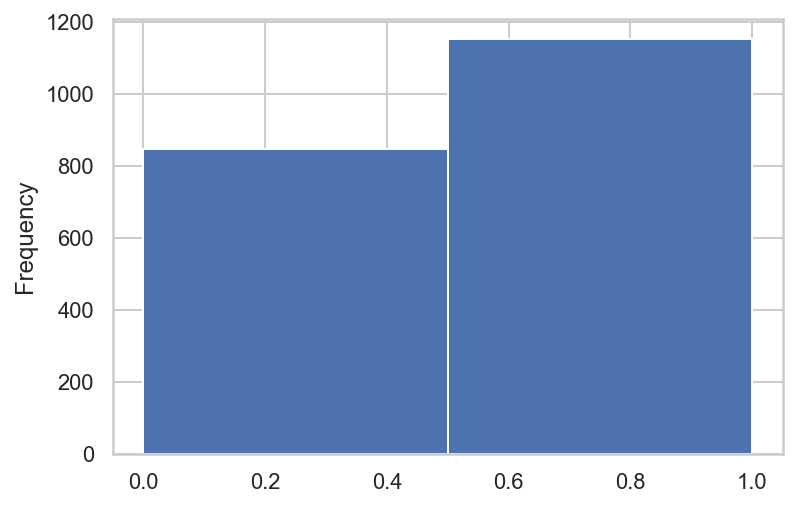

In [43]:
# Check distribution in target variable
print('Total: \n')
print(df_user['has_applied'].value_counts())
print()
print('%: \n')
print(df_user['has_applied'].value_counts()/len(df_user)*100)
print()
df_user['has_applied'].plot.hist(bins=2)

**Note:** We could balance out the target variable, but we can work with that distribution. 

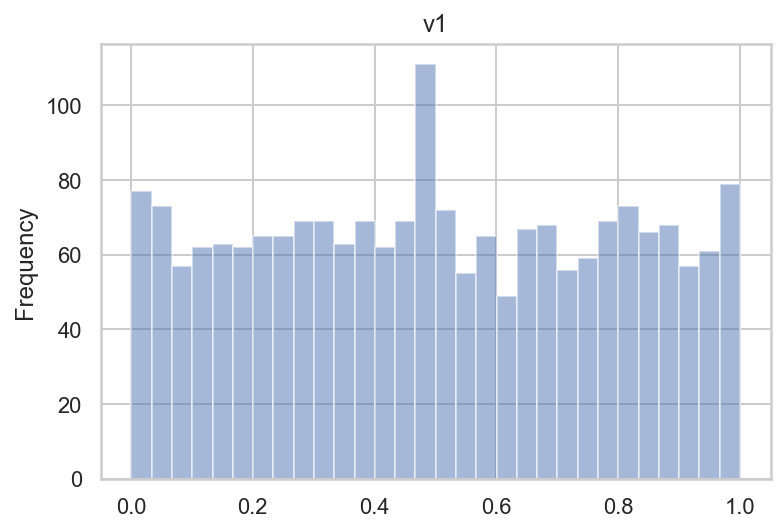

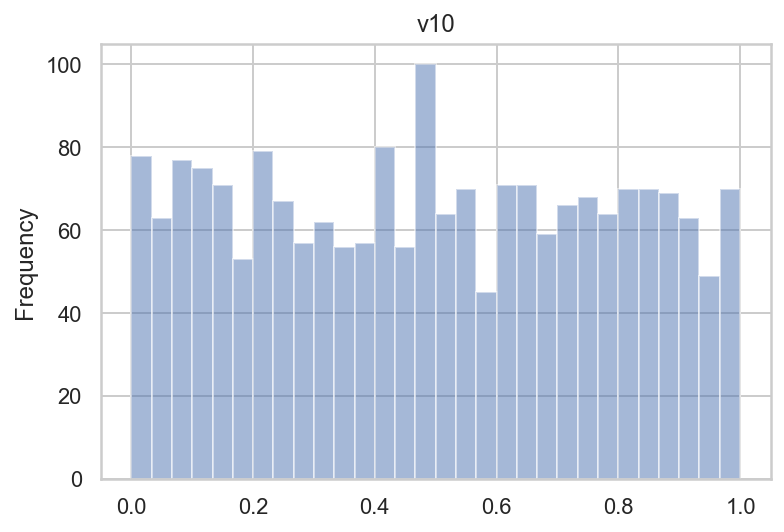

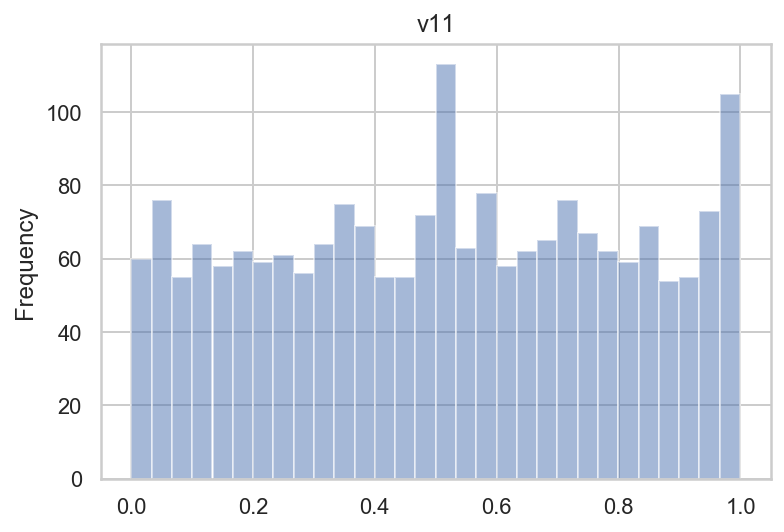

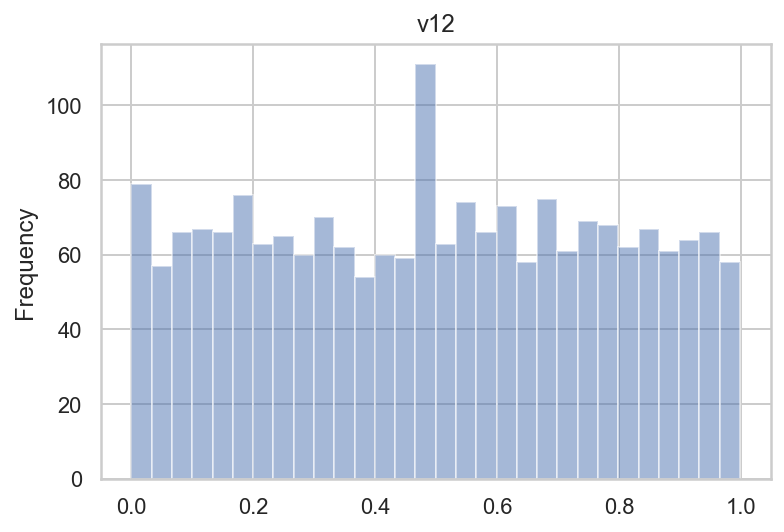

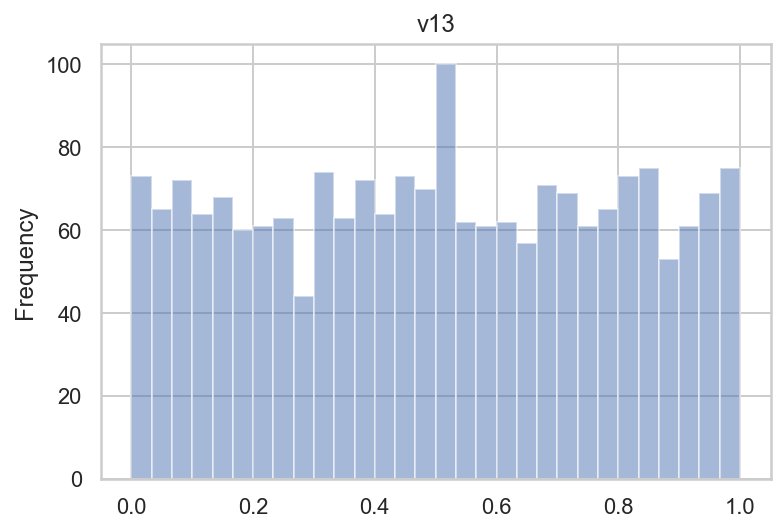

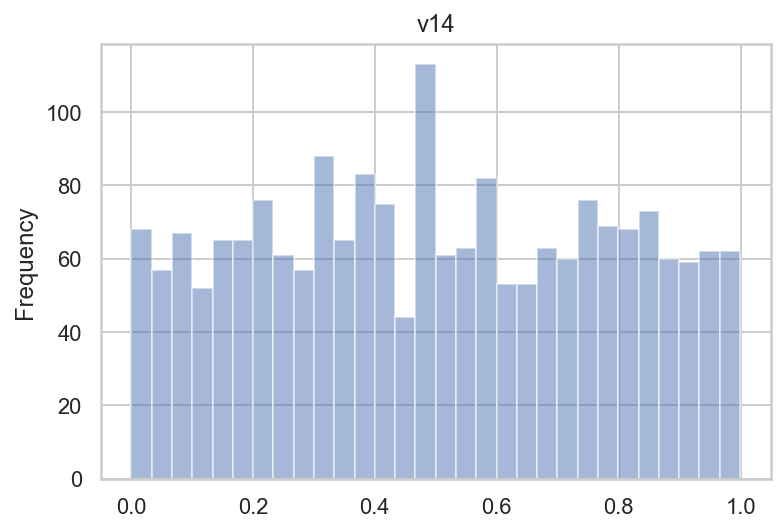

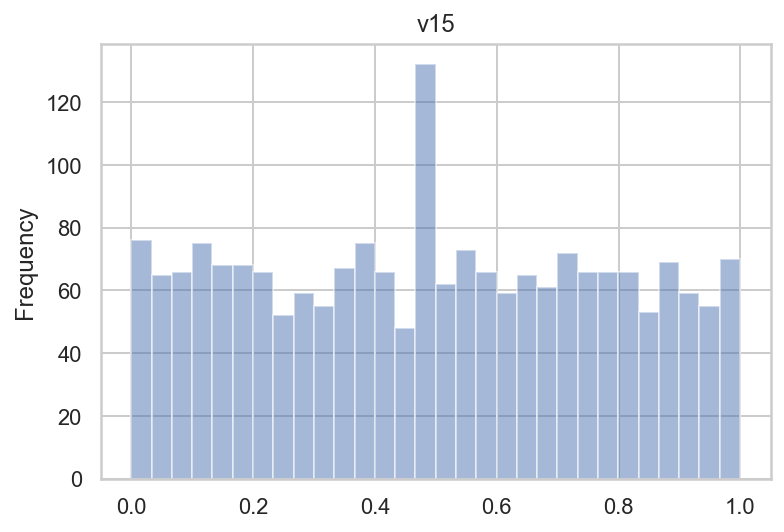

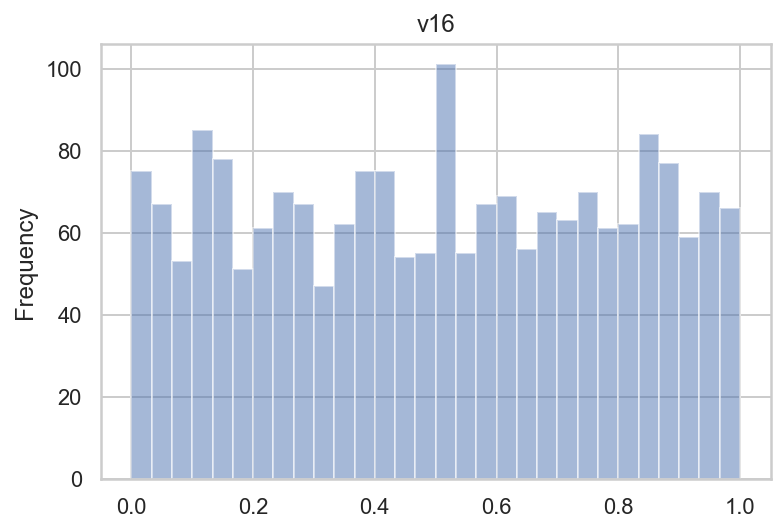

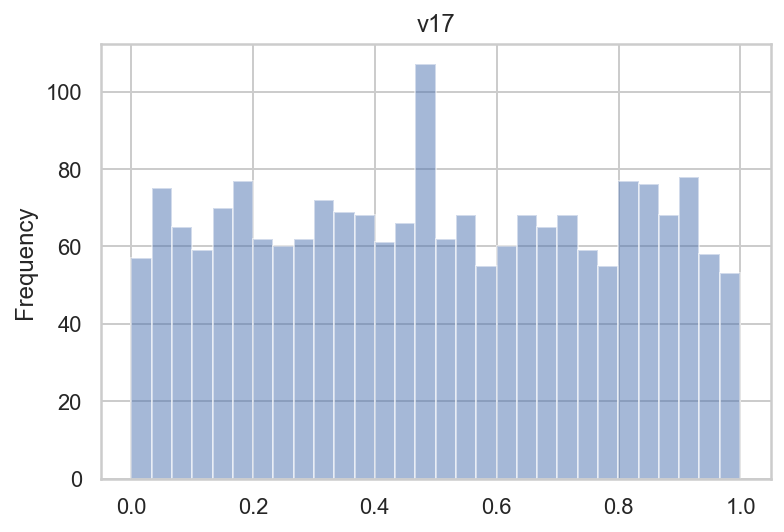

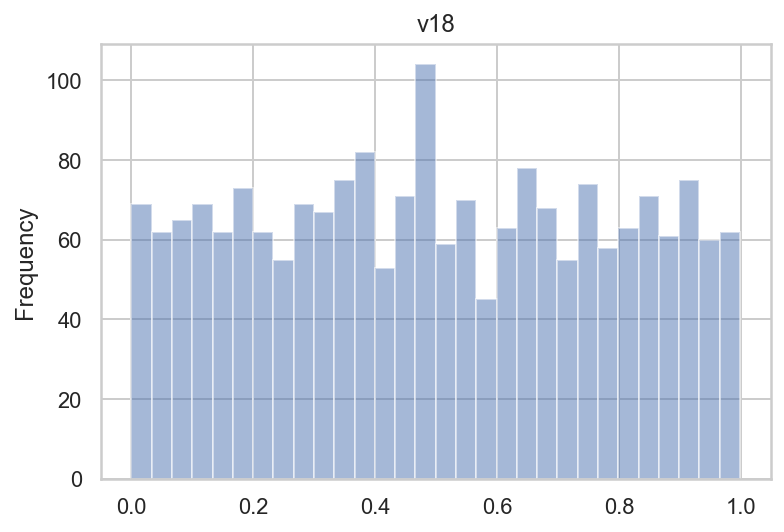

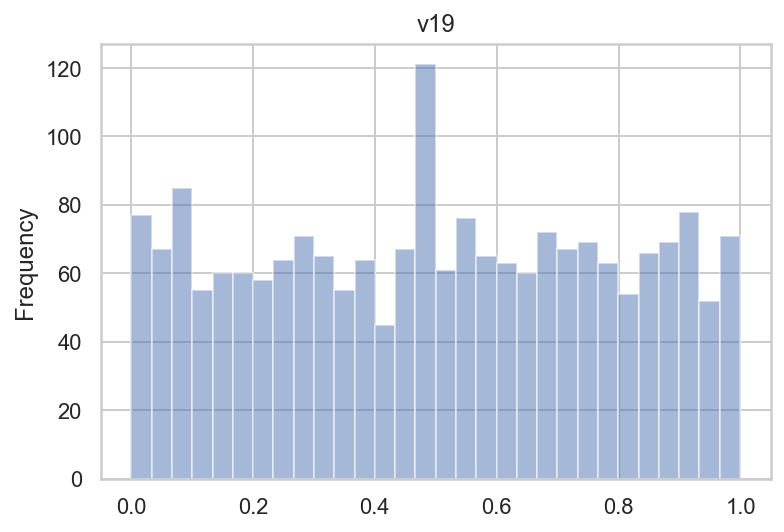

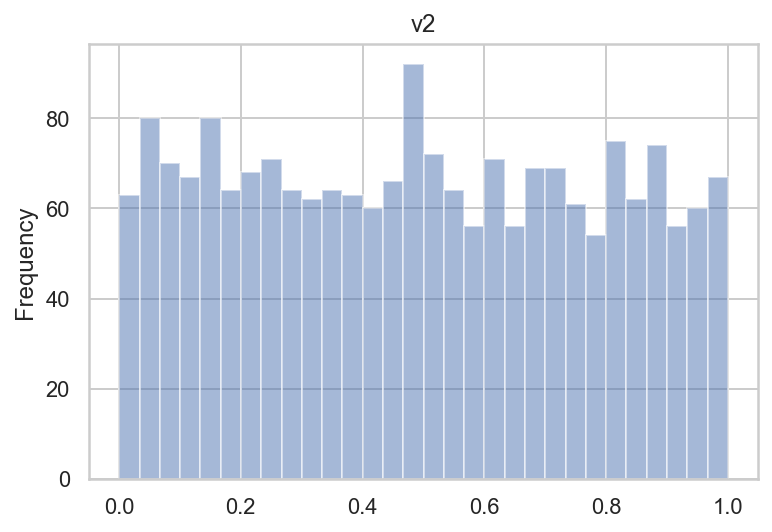

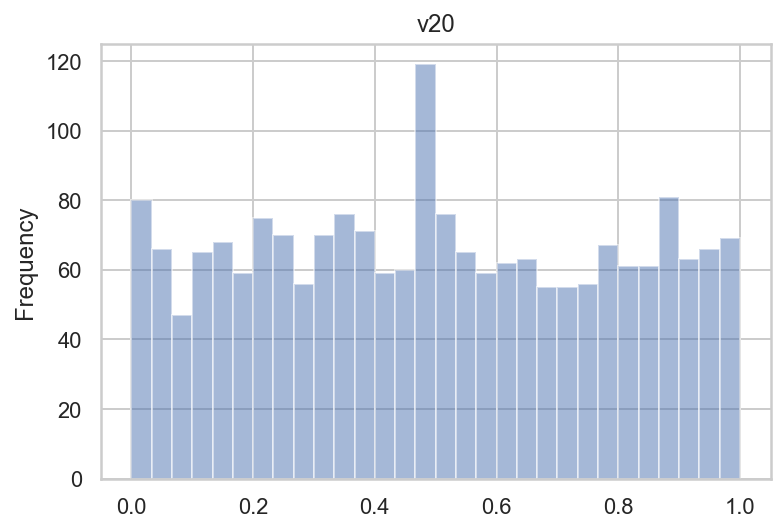

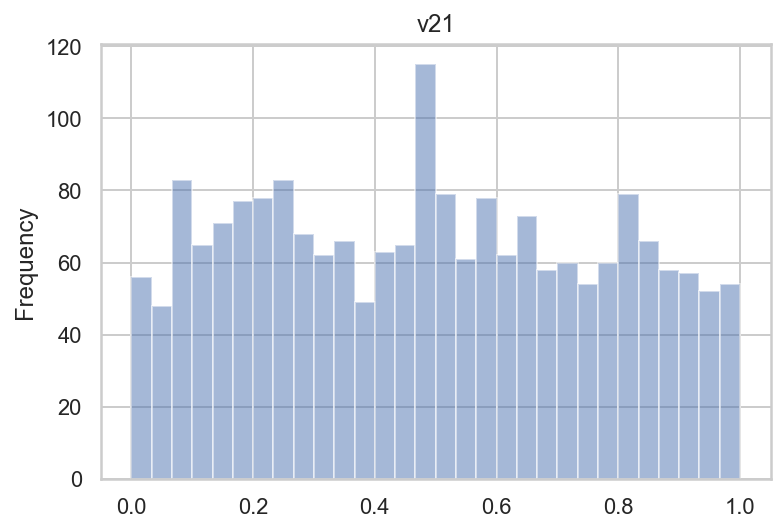

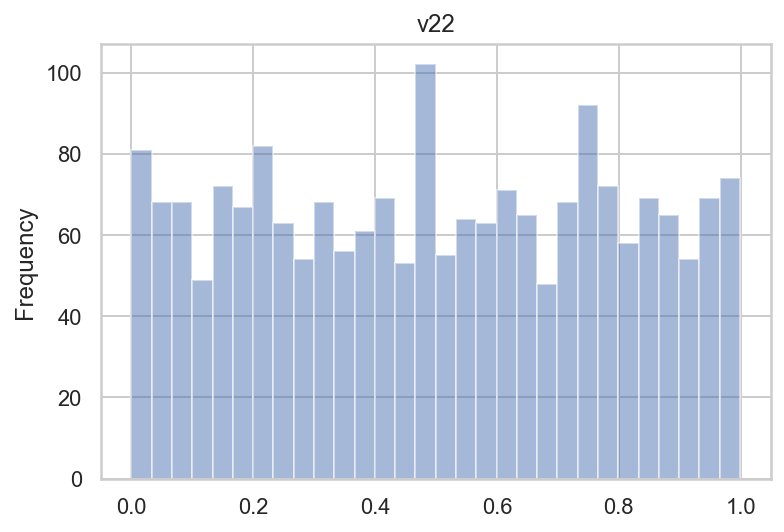

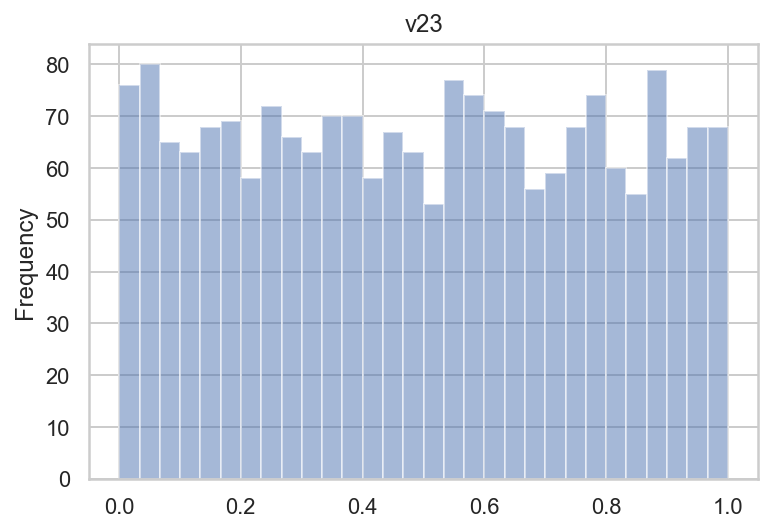

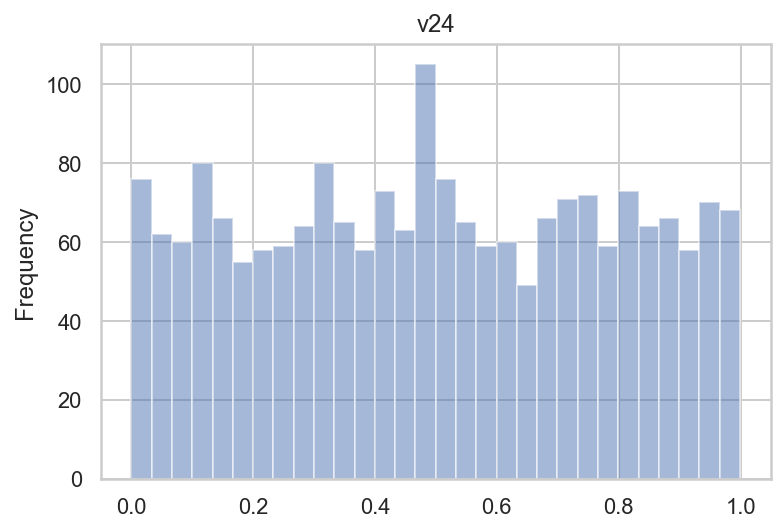

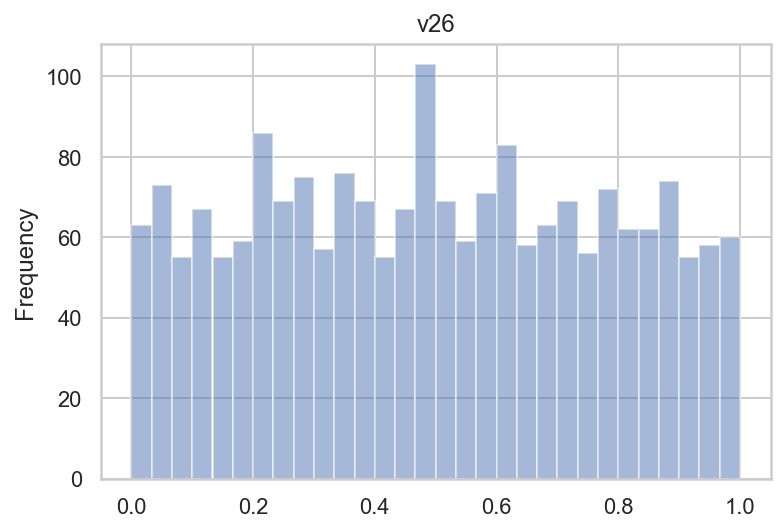

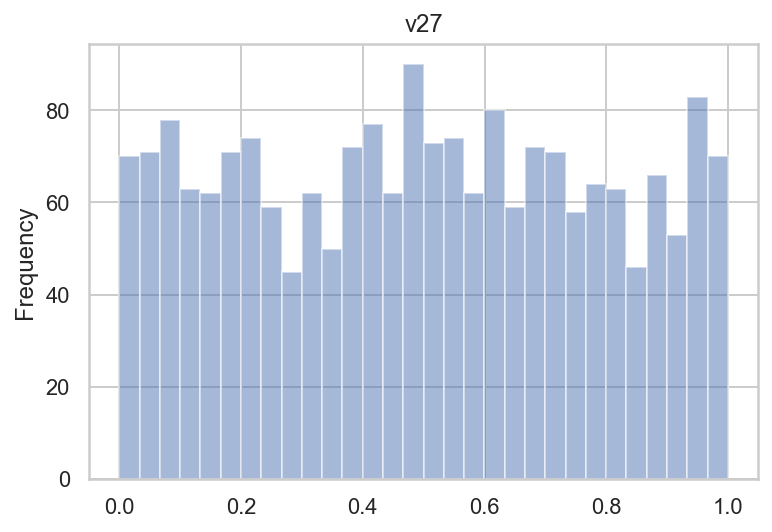

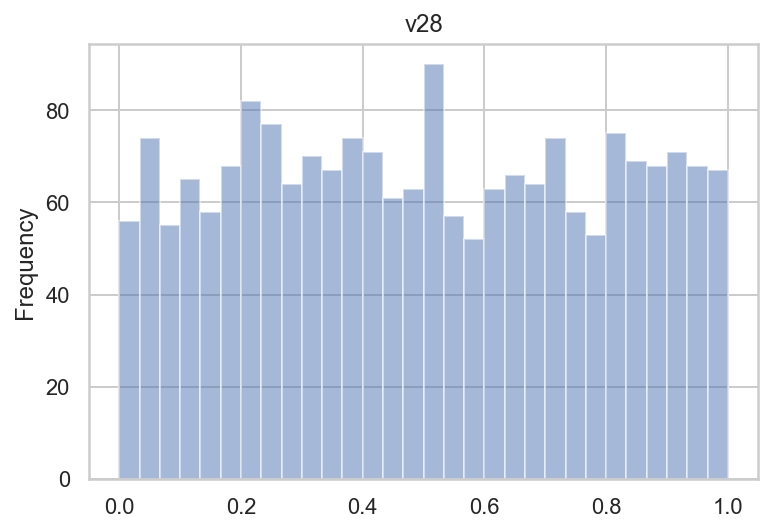

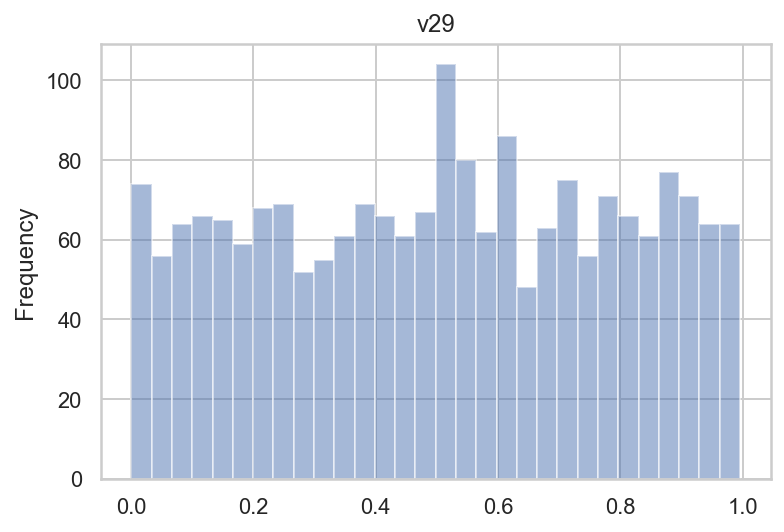

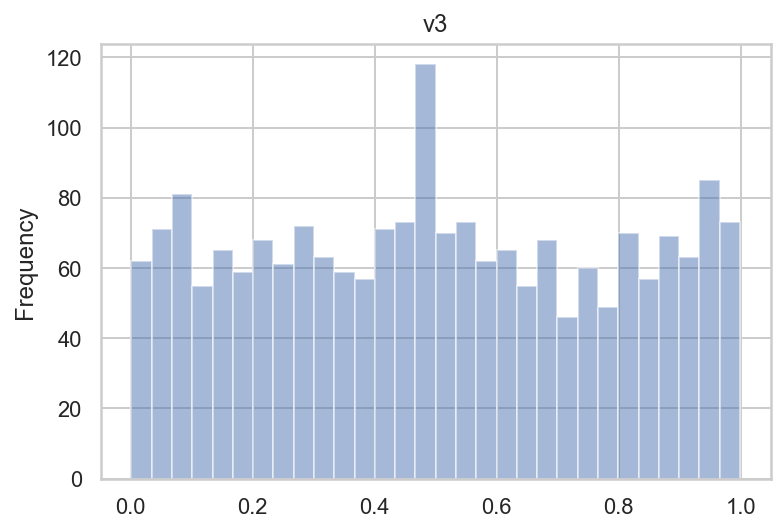

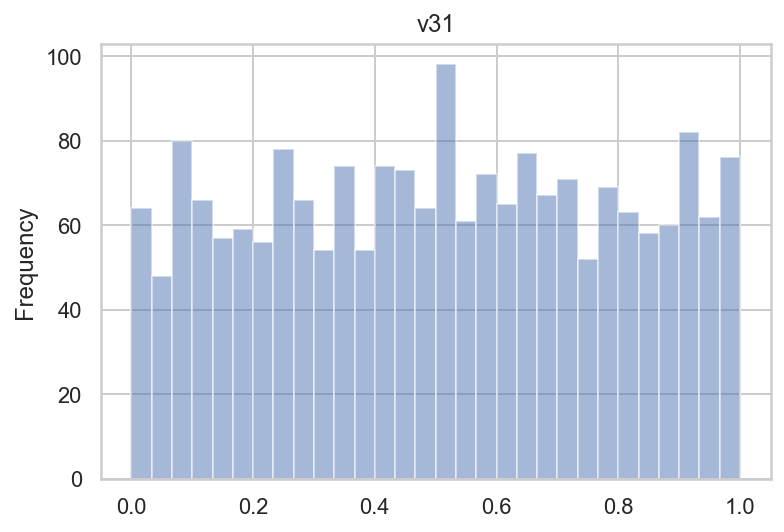

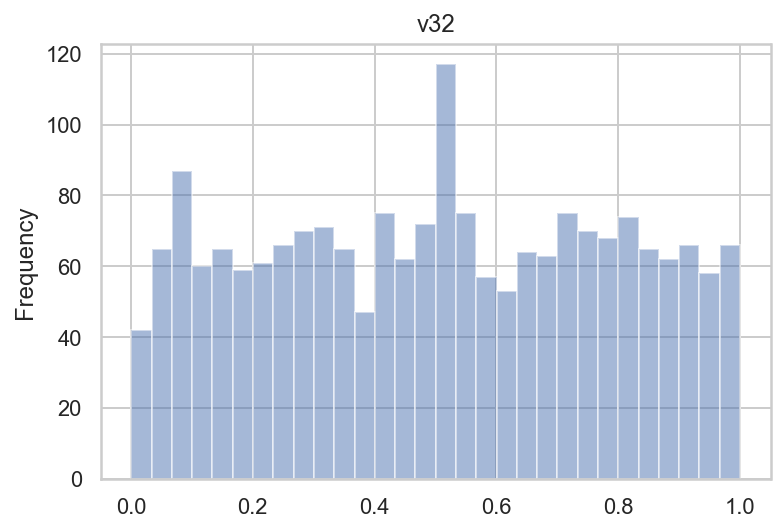

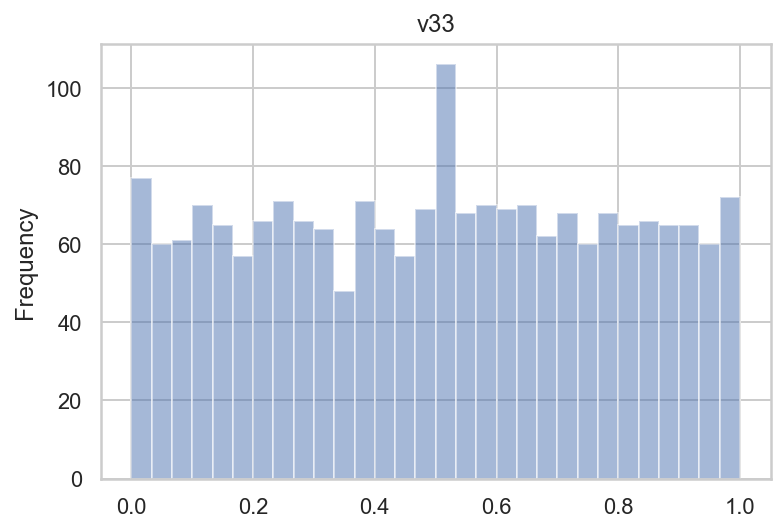

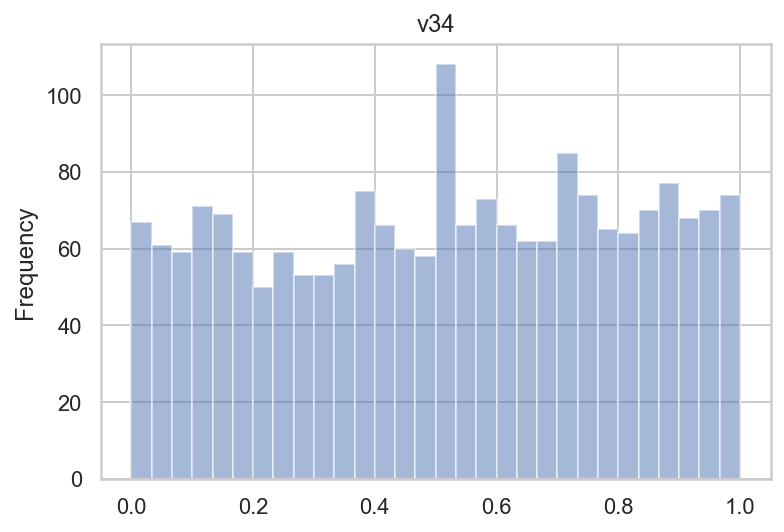

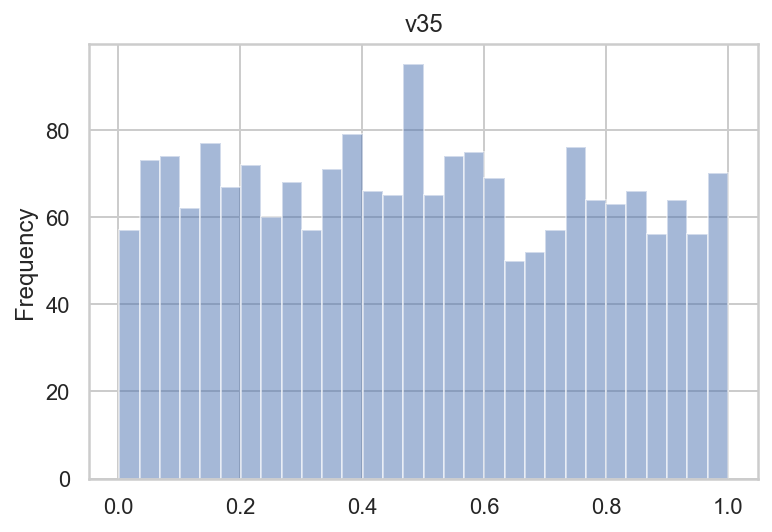

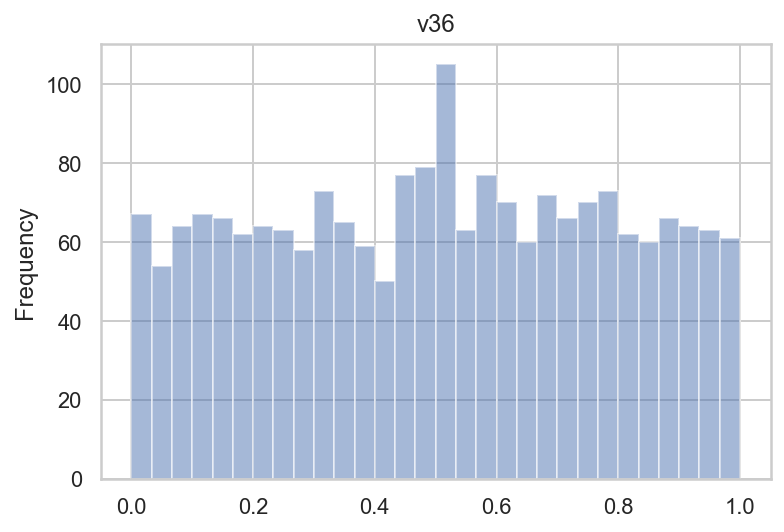

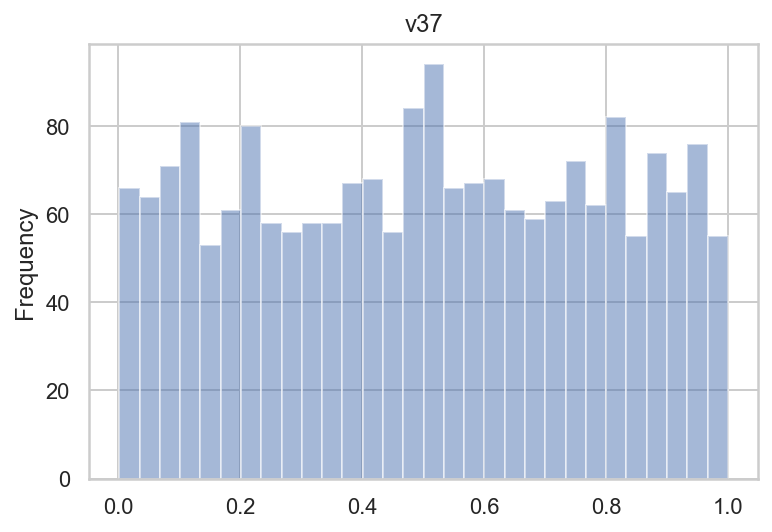

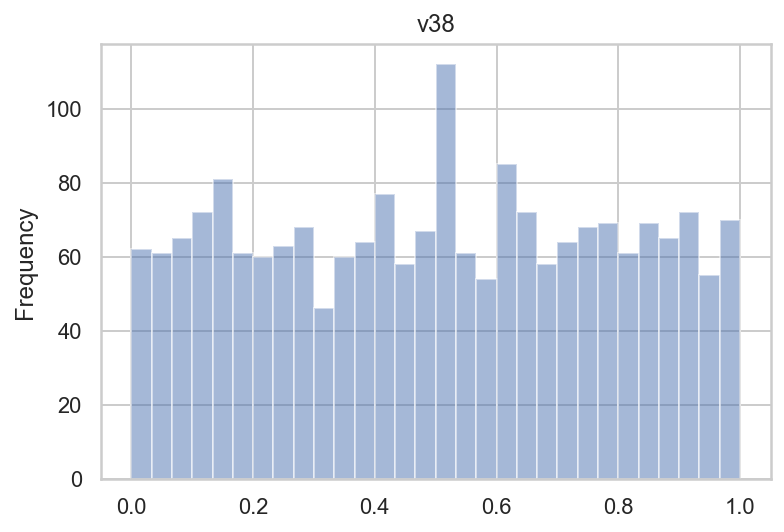

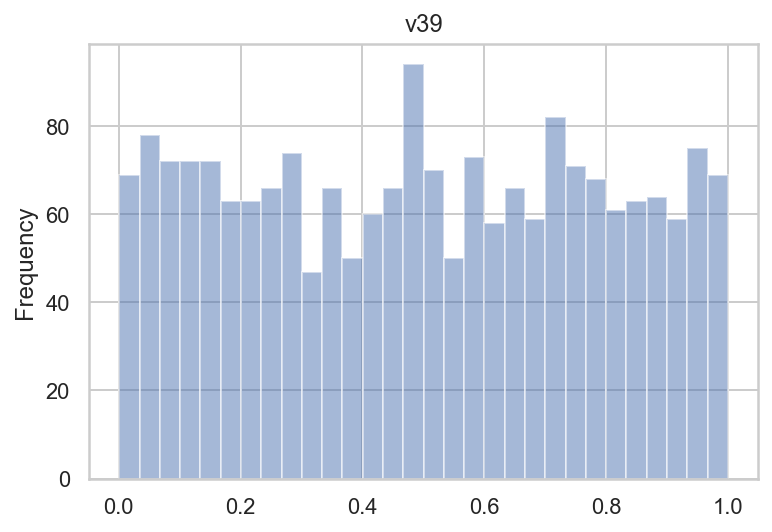

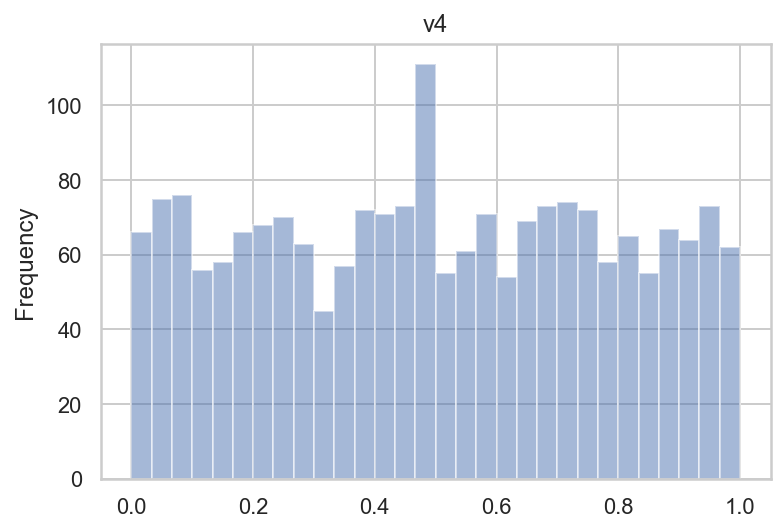

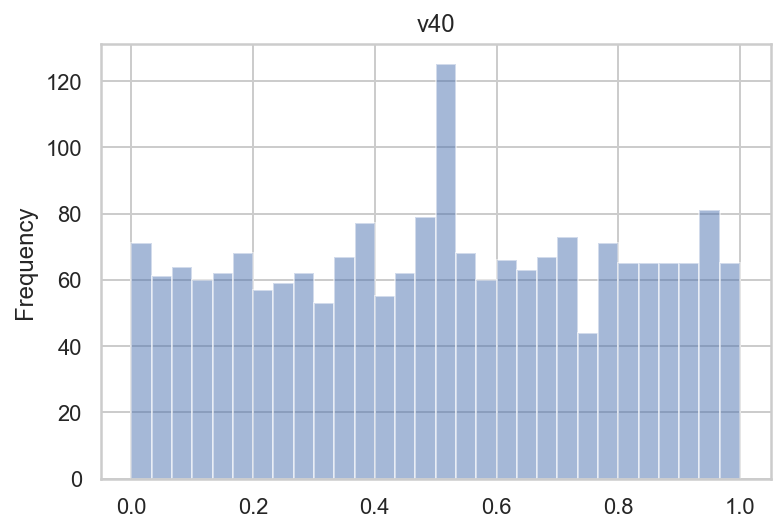

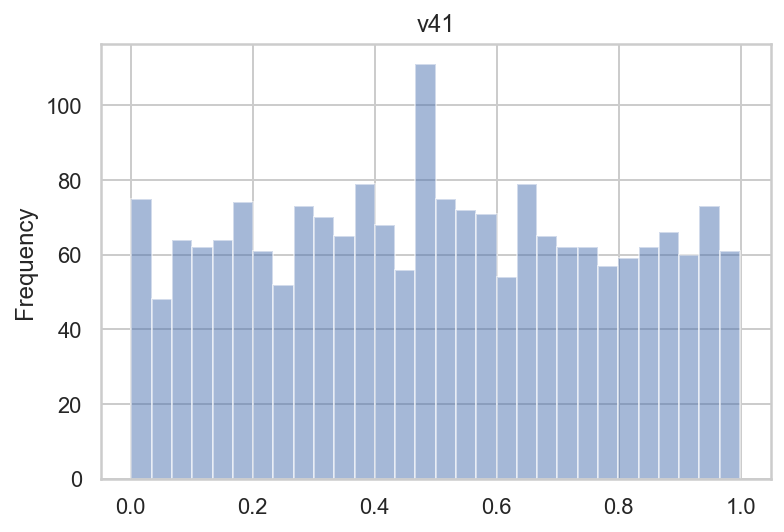

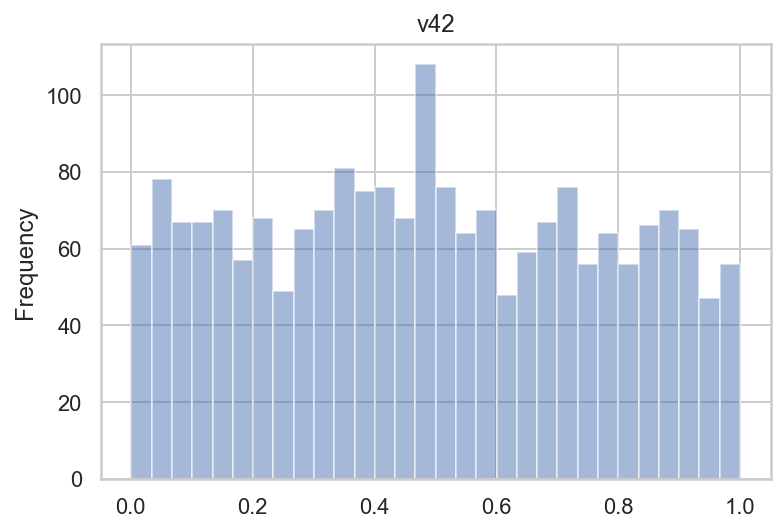

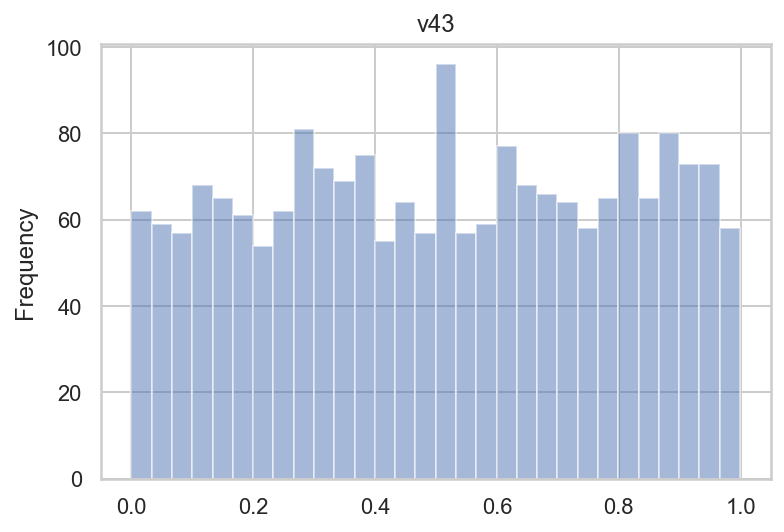

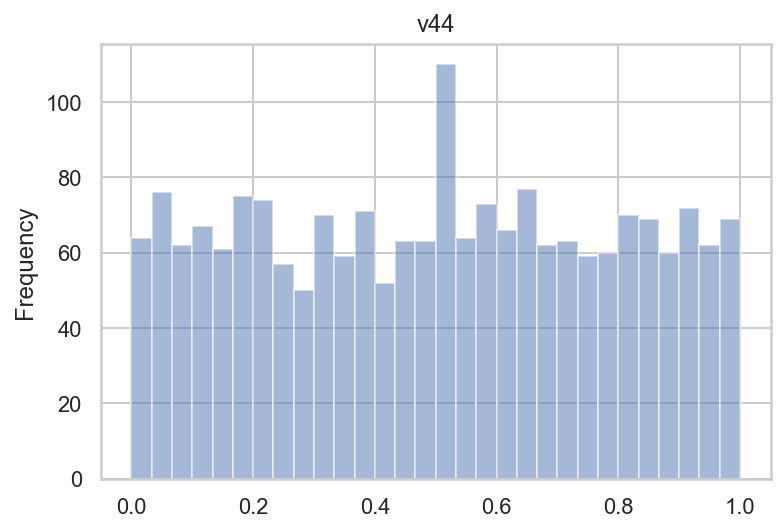

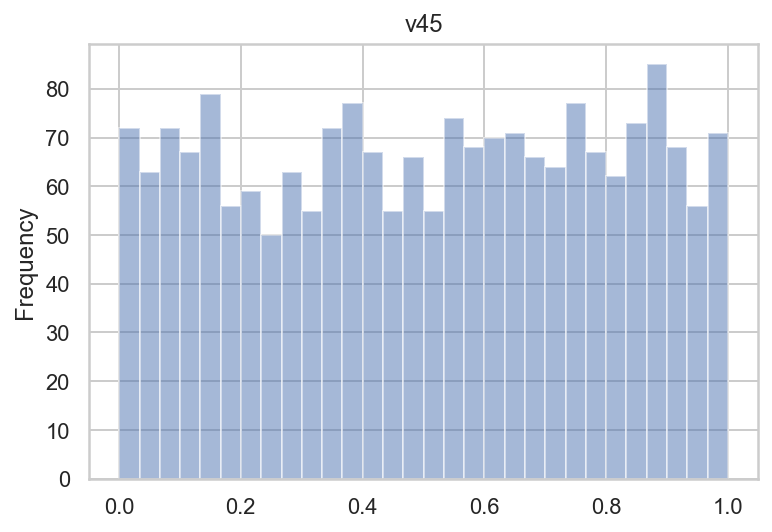

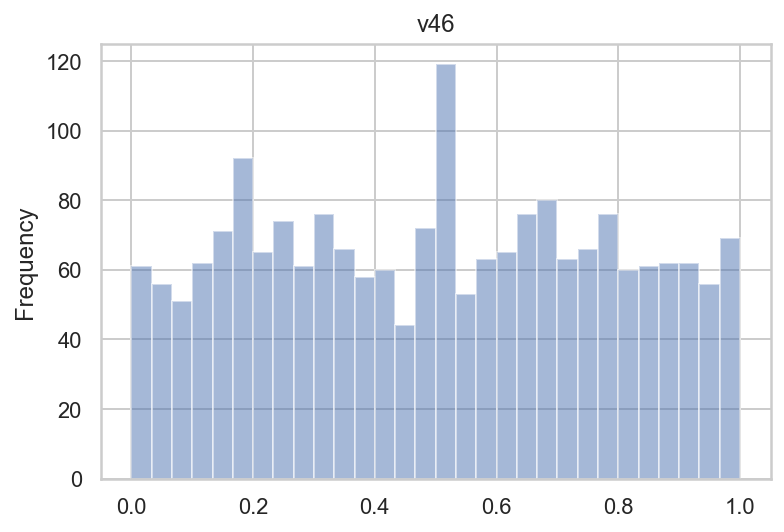

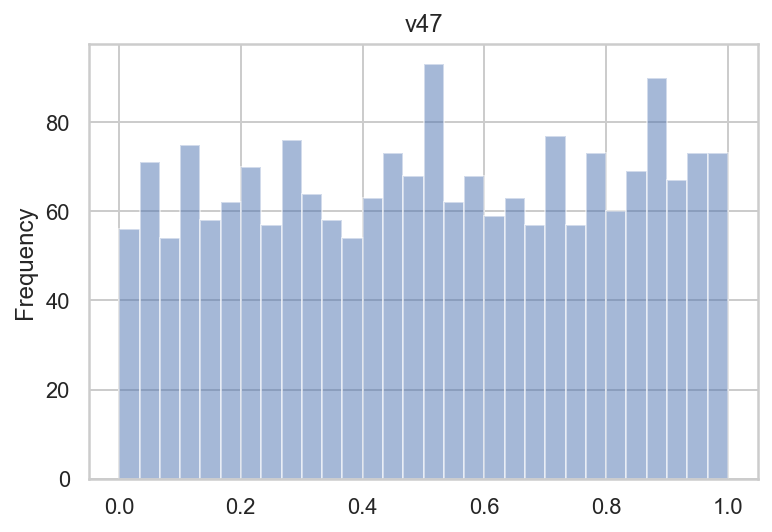

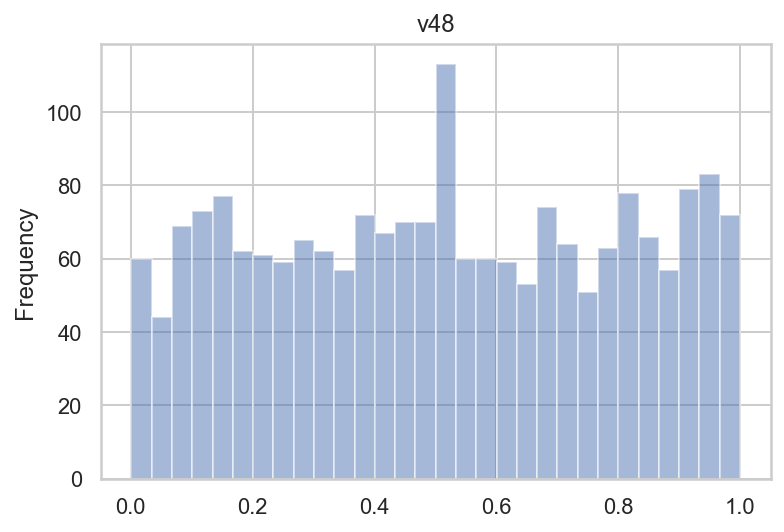

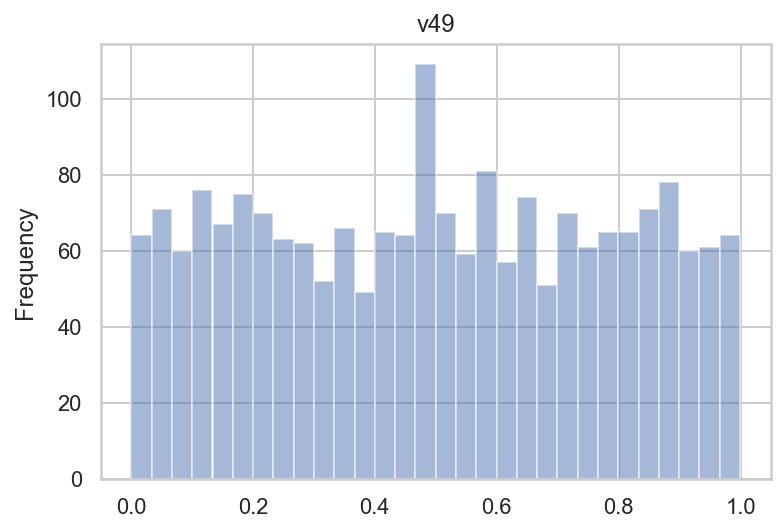

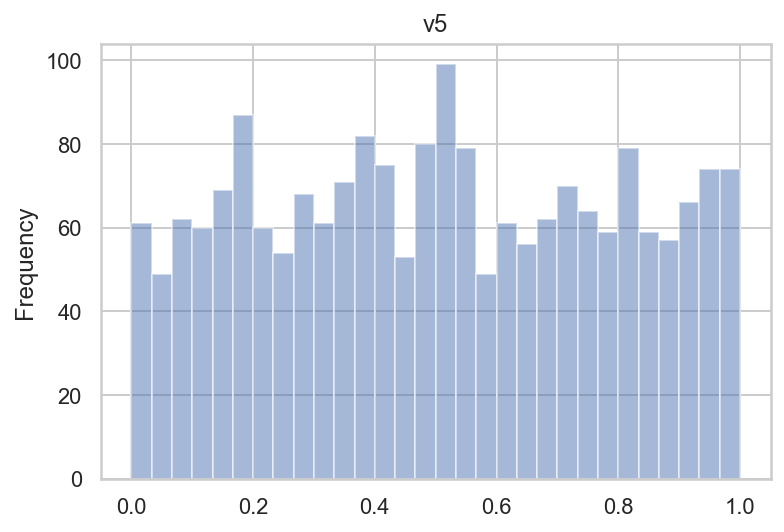

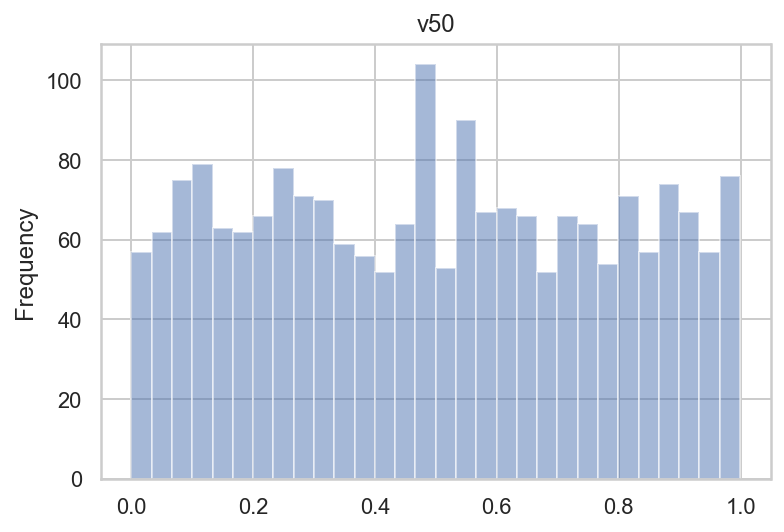

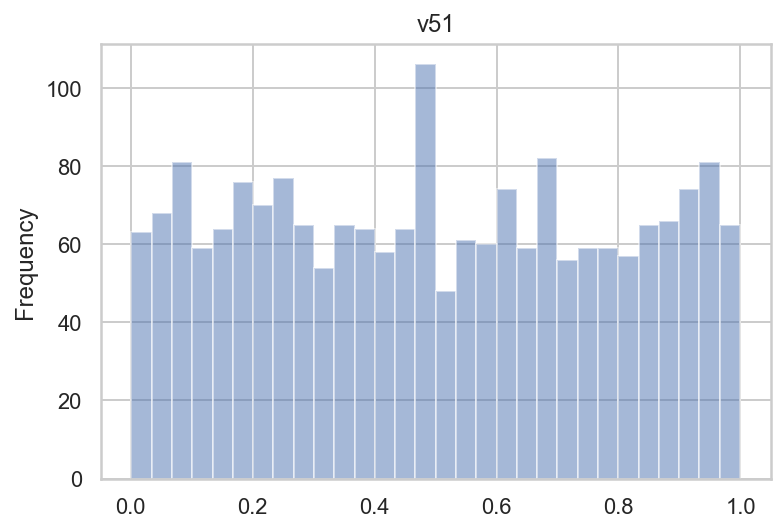

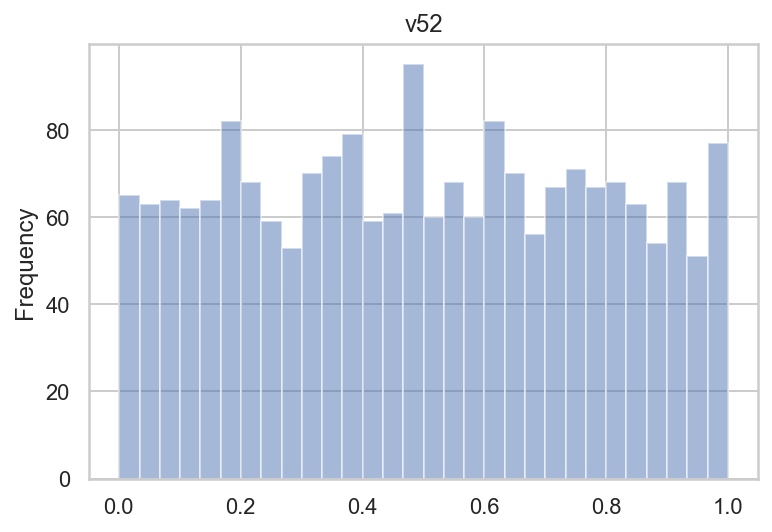

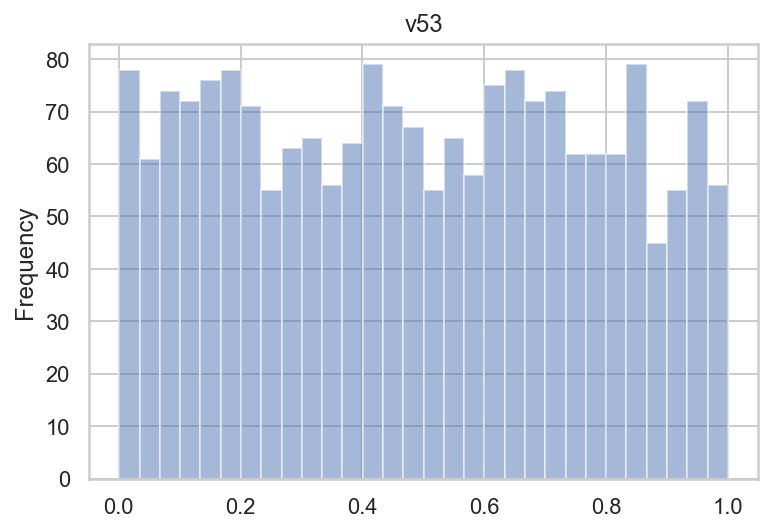

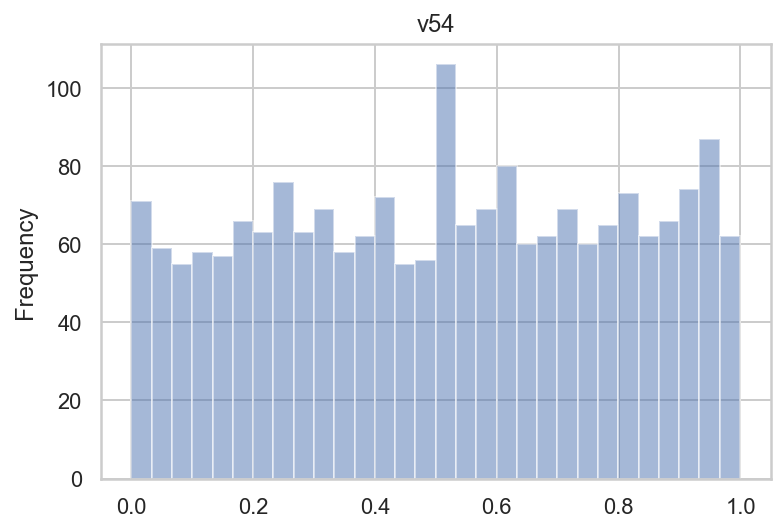

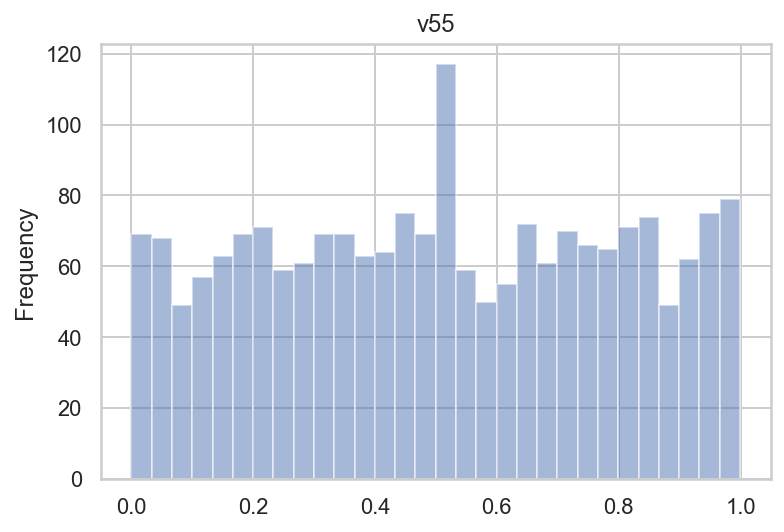

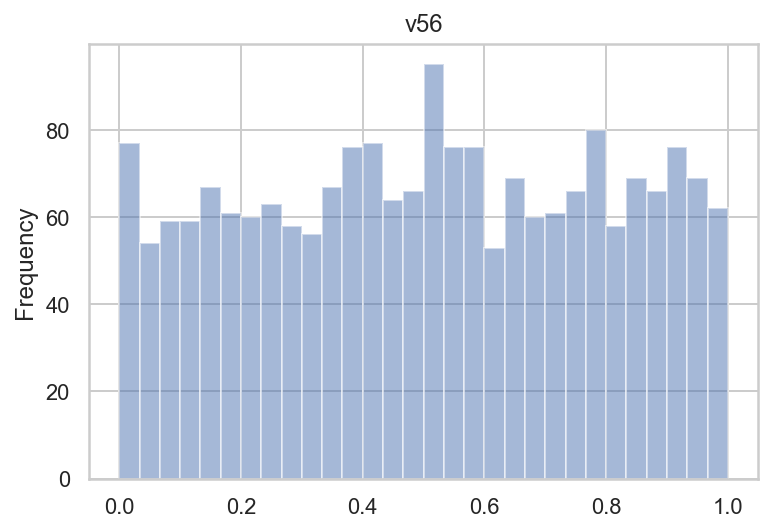

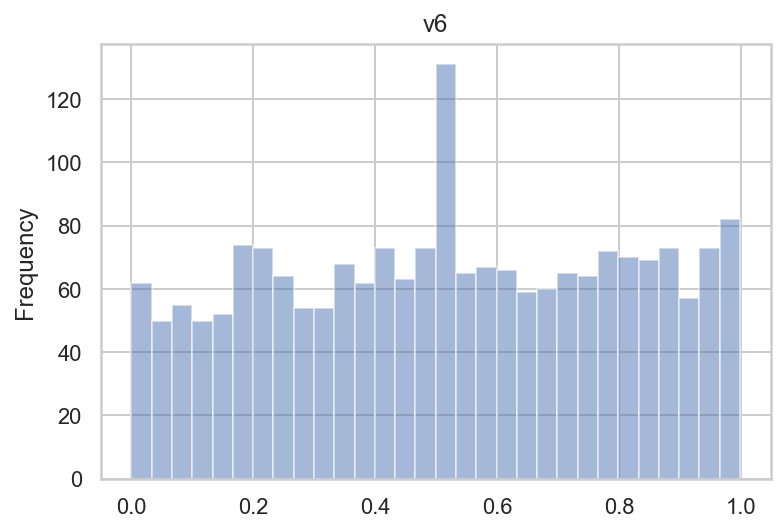

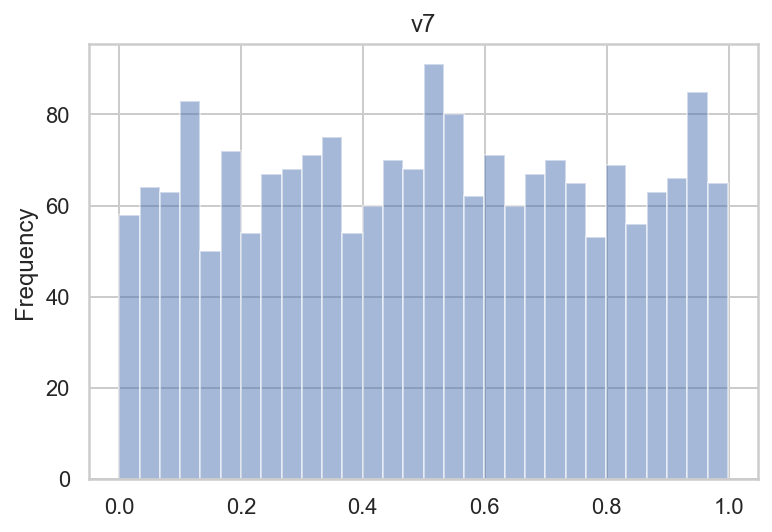

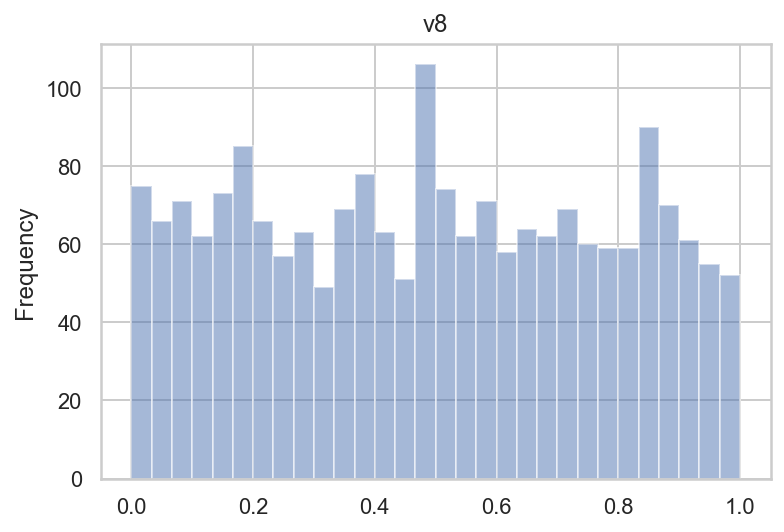

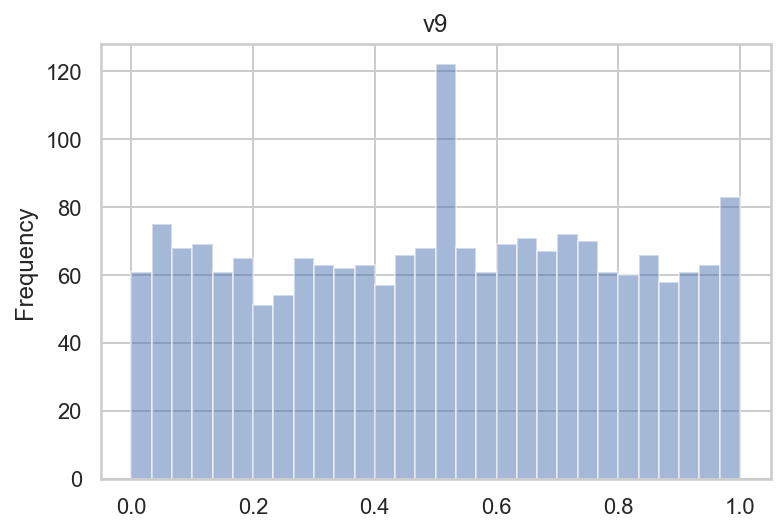

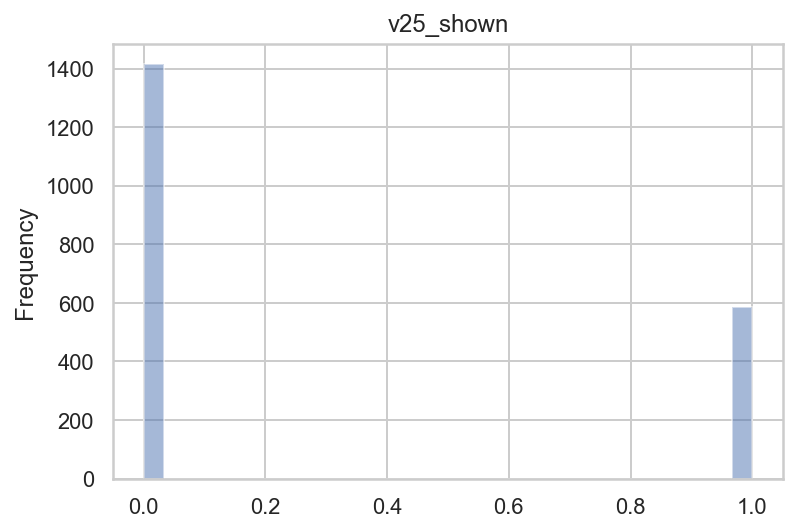

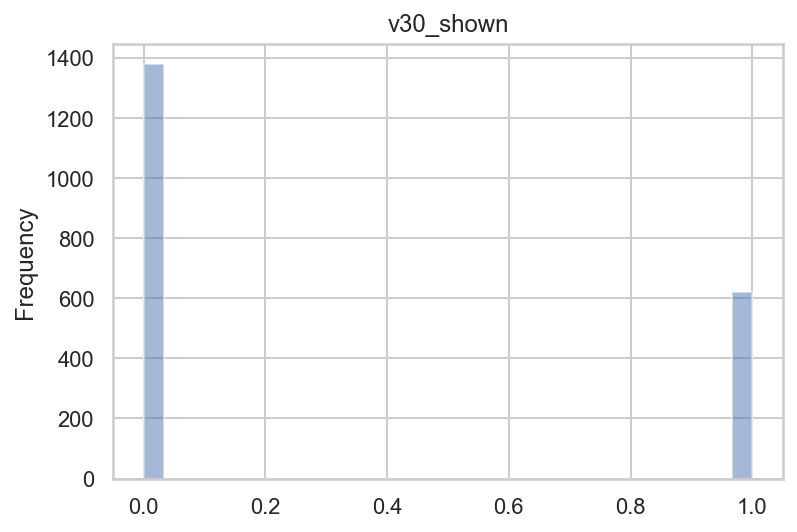

In [44]:
# Check distribution of numerical variables
def analyse_num_vars(df, var):
    df[var].plot.hist(alpha=0.5, bins=30)
    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in num_vars:
    analyse_num_vars(df_user[num_vars], var)

In [45]:
# Check correlation with other variables and target variable
df = df_user.drop(columns=['user_id'])
corr = df.corr()

idx_factor = 8 # integer
fig = plt.figure(figsize=(16*idx_factor, 9*idx_factor))
plt.suptitle('Histograms of Numerical Columns', fontsize=20*idx_factor)


#fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
cbar = fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.tick_params(labelsize=6*idx_factor)
cbar.ax.tick_params(labelsize=6*idx_factor)
fig.savefig('example.png')

**Note:** We could investigate further with variables v25 and v30

### Combine datasets

User_id variable was unique in job_desc table. The job desc corresponds to each user. 


In [46]:
df_job_desc.head(3)

,job_title_full,user_id,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior
0,Junior Manager Innovation Lab - France (M/F/D),U1,1,0,0,0,0,0,1,0,46,0,0,0
1,Junior Product Manager - Mobile,U2,1,1,0,0,0,0,0,0,32,0,0,0
2,Junior Brand Marketing Manager - Mobile (M/F/D),U3,1,0,0,0,0,0,1,0,47,0,0,0


In [47]:
df_user.head(3)

,user_id,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,U1,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,U2,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,U3,1,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


In [48]:
# Joining data
key_col = 'user_id'

left = df_job_desc.copy()
left_cols = left.columns.tolist()
left_cols.remove(key_col)

right = df_user.copy()
right_cols = right.columns.tolist()
right_cols.remove(key_col)

data = pd.merge(left, right, how='left', on=[key_col])

columns = [key_col] + left_cols + right_cols

data = data[columns]
data.head(3)

,user_id,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,U1,Junior Manager Innovation Lab - France (M/F/D),1,0,0,0,0,0,1,0,46,0,0,0,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,U2,Junior Product Manager - Mobile,1,1,0,0,0,0,0,0,32,0,0,0,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,U3,Junior Brand Marketing Manager - Mobile (M/F/D),1,0,0,0,0,0,1,0,47,0,0,0,1,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="feature-engineering"></a>  05 - Feature engineering
###### <p style="background-color:#f5f5f5">&nbsp;</p>

### Apply basic NLP techniques
inspired by https://towardsdatascience.com/text-classification-in-python-dd95d264c802

In [49]:
df_vectorized_text = data[['job_title_full']].copy()
df_vectorized_text.head(3)

,job_title_full
0,Junior Manager Innovation Lab - France (M/F/D)
1,Junior Product Manager - Mobile
2,Junior Brand Marketing Manager - Mobile (M/F/D)


In [50]:
# Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [51]:
x = 'Junior Manager Innovation Lab - France (M/F/D)'
wordnet_lemmatizer.lemmatize(x, pos='v')

'Junior Manager Innovation Lab - France (M/F/D)'

In [52]:
df = df_vectorized_text['job_title_full']
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
    

In [53]:
data['job_title_full'] = lemmatized_text_list
data.head(3)

,user_id,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,U1,Junior Manager Innovation Lab - France (M/F/D),1,0,0,0,0,0,1,0,46,0,0,0,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,U2,Junior Product Manager - Mobile,1,1,0,0,0,0,0,0,32,0,0,0,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,U3,Junior Brand Marketing Manager - Mobile (M/F/D),1,0,0,0,0,0,1,0,47,0,0,0,1,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


### Train - Test split

In [54]:
data.head(3)

,user_id,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,U1,Junior Manager Innovation Lab - France (M/F/D),1,0,0,0,0,0,1,0,46,0,0,0,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,U2,Junior Product Manager - Mobile,1,1,0,0,0,0,0,0,32,0,0,0,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,U3,Junior Brand Marketing Manager - Mobile (M/F/D),1,0,0,0,0,0,1,0,47,0,0,0,1,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


In [55]:
data.shape

(2000, 71)

In [56]:
dataset = data.drop(columns=['user_id'])
target_variable = 'has_applied'
X =  dataset.drop(columns=[target_variable])
y = dataset[[target_variable]]

In [57]:
X.head(3)

,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,Junior Manager Innovation Lab - France (M/F/D),1,0,0,0,0,0,1,0,46,0,0,0,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,Junior Product Manager - Mobile,1,1,0,0,0,0,0,0,32,0,0,0,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,Junior Brand Marketing Manager - Mobile (M/F/D),1,0,0,0,0,0,1,0,47,0,0,0,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


In [58]:
y.head(3)

,has_applied
0,1
1,1
2,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Training: X, y \n', X_train.shape, y_train.shape)
print('\nTest: X, y \n', X_test.shape, y_test.shape)

Training: X, y 
 (1600, 69) (1600, 1)

Test: X, y 
 (400, 69) (400, 1)


In [60]:
X_train.head(2)

,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
1176,Senior Data Consultant - Pricing & Forecasting...,0,0,0,0,0,0,0,1,54,0,0,1,0.800590,0.764486,0.927675,0.746376,0.497108,0.198299,0.151309,0.543801,0.903000,0.086845,0.737662,0.610375,0.091258,0.177079,0.725529,0.688359,0.566383,0.104091,0.538285,0.173755,0.272441,0.822436,0.111671,0.713900,0.659621,0.519424,0.417885,0.295523,0.275648,0.421748,0.342565,0.736988,0.846858,0.844105,0.784579,0.100932,0.755235,0.219401,0.880852,0.427241,0.572786,0.508419,0.306105,0.832395,0.320192,0.459725,0.990721,0.787765,0.923675,0.854989,0.666300,0.721772,0.167032,0.561079,1,1
1128,Senior Data Analyst - Pricing Team M/F/D,1,0,0,0,0,1,0,0,40,0,0,1,0.708824,0.522181,0.968036,0.926360,0.521577,0.625419,0.277166,0.058199,0.528189,0.239789,0.184820,0.414826,0.177510,0.337533,0.733176,0.817797,0.739577,0.261174,0.081856,0.514217,0.060702,0.685724,0.006379,0.312431,0.084030,0.159856,0.207253,0.963574,0.923294,0.308601,0.163729,0.075563,0.828598,0.962160,0.713956,0.960186,0.964262,0.726461,0.169406,0.105069,0.947433,0.075983,0.808458,0.321778,0.212859,0.368951,0.123856,0.201809,0.441171,0.196380,0.972027,0.114142,0.490166,0.942443,0,0


In [61]:
y_train.head(2)

,has_applied
1176,0
1128,0


In [62]:
X_test.head(2)

,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
51,Data Scientist - Supplier Financing,0,0,0,0,1,0,0,0,36,0,1,0,0.989444,0.903603,0.81246,0.493071,0.345870,0.509175,0.693852,0.677132,0.153114,0.953218,0.766057,0.375519,0.469256,0.146733,0.387277,0.08855,0.699252,0.179448,0.172627,0.308279,0.625169,0.499560,0.659476,0.804037,0.191992,0.834269,0.018301,0.332461,0.822711,0.400326,0.952316,0.850564,0.047616,0.876019,0.017688,0.557205,0.633697,0.859133,0.076443,0.397284,0.532845,0.271048,0.345485,0.343225,0.286632,0.528915,0.307095,0.007897,0.561186,0.283883,0.857372,0.991256,0.961178,0.115547,0,0
1327,Senior UI Designer,0,0,0,0,0,0,1,0,18,0,0,1,0.395811,0.354945,0.81373,0.487021,0.493951,0.276936,0.335526,0.319073,0.334001,0.512016,0.306745,0.995629,0.463989,0.547501,0.491725,0.83277,0.927878,0.858097,0.937104,0.517678,0.164704,0.481989,0.505842,0.156110,0.855205,0.690307,0.397182,0.763055,0.832418,0.158222,0.772104,0.083197,0.152581,0.527194,0.130449,0.632051,0.182755,0.961942,0.388462,0.918120,0.499316,0.279946,0.296189,0.240809,0.624465,0.975572,0.394680,0.228227,0.338022,0.117244,0.361685,0.720578,0.874142,0.924861,0,1


In [63]:
y_test.head(2)

,has_applied
51,0
1327,1


### Normalization

In [64]:
X_train.head(3)

,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
1176,Senior Data Consultant - Pricing & Forecasting...,0,0,0,0,0,0,0,1,54,0,0,1,0.800590,0.764486,0.927675,0.746376,0.497108,0.198299,0.151309,0.543801,0.903000,0.086845,0.737662,0.610375,0.091258,0.177079,0.725529,0.688359,0.566383,0.104091,0.538285,0.173755,0.272441,0.822436,0.111671,0.713900,0.659621,0.519424,0.417885,0.295523,0.275648,0.421748,0.342565,0.736988,0.846858,0.844105,0.784579,0.100932,0.755235,0.219401,0.880852,0.427241,0.572786,0.508419,0.306105,0.832395,0.320192,0.459725,0.990721,0.787765,0.923675,0.854989,0.666300,0.721772,0.167032,0.561079,1,1
1128,Senior Data Analyst - Pricing Team M/F/D,1,0,0,0,0,1,0,0,40,0,0,1,0.708824,0.522181,0.968036,0.926360,0.521577,0.625419,0.277166,0.058199,0.528189,0.239789,0.184820,0.414826,0.177510,0.337533,0.733176,0.817797,0.739577,0.261174,0.081856,0.514217,0.060702,0.685724,0.006379,0.312431,0.084030,0.159856,0.207253,0.963574,0.923294,0.308601,0.163729,0.075563,0.828598,0.962160,0.713956,0.960186,0.964262,0.726461,0.169406,0.105069,0.947433,0.075983,0.808458,0.321778,0.212859,0.368951,0.123856,0.201809,0.441171,0.196380,0.972027,0.114142,0.490166,0.942443,0,0
184,Lead Performance Marketing Manager - Mobile (M...,1,0,0,0,0,1,0,0,51,1,0,0,0.894660,0.720629,0.399706,0.495935,0.407424,0.213233,0.139104,0.000311,0.147538,0.742534,0.660931,0.610351,0.112332,0.766648,0.966395,0.226718,0.998147,0.184484,0.664912,0.983521,0.434799,0.246990,0.382397,0.018492,0.001884,0.716124,0.230895,0.138357,0.933133,0.870591,0.525601,0.537225,0.375312,0.215991,0.562722,0.281621,0.567579,0.839471,0.818397,0.837589,0.575580,0.928756,0.505224,0.804561,0.341863,0.283058,0.700622,0.616619,0.900366,0.178636,0.318896,0.622230,0.535830,0.483944,0,0


In [65]:
X_test.head(3)

,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
51,Data Scientist - Supplier Financing,0,0,0,0,1,0,0,0,36,0,1,0,0.989444,0.903603,0.812460,0.493071,0.345870,0.509175,0.693852,0.677132,0.153114,0.953218,0.766057,0.375519,0.469256,0.146733,0.387277,0.088550,0.699252,0.179448,0.172627,0.308279,0.625169,0.499560,0.659476,0.804037,0.191992,0.834269,0.018301,0.332461,0.822711,0.400326,0.952316,0.850564,0.047616,0.876019,0.017688,0.557205,0.633697,0.859133,0.076443,0.397284,0.532845,0.271048,0.345485,0.343225,0.286632,0.528915,0.307095,0.007897,0.561186,0.283883,0.857372,0.991256,0.961178,0.115547,0,0
1327,Senior UI Designer,0,0,0,0,0,0,1,0,18,0,0,1,0.395811,0.354945,0.813730,0.487021,0.493951,0.276936,0.335526,0.319073,0.334001,0.512016,0.306745,0.995629,0.463989,0.547501,0.491725,0.832770,0.927878,0.858097,0.937104,0.517678,0.164704,0.481989,0.505842,0.156110,0.855205,0.690307,0.397182,0.763055,0.832418,0.158222,0.772104,0.083197,0.152581,0.527194,0.130449,0.632051,0.182755,0.961942,0.388462,0.918120,0.499316,0.279946,0.296189,0.240809,0.624465,0.975572,0.394680,0.228227,0.338022,0.117244,0.361685,0.720578,0.874142,0.924861,0,1
1488,Junior Backend Developer M/F/D,0,0,0,0,0,1,0,0,30,0,0,0,0.529332,0.202880,0.904634,0.548118,0.939832,0.324028,0.646081,0.050698,0.102874,0.794205,0.205193,0.291648,0.490191,0.977430,0.907400,0.147085,0.650706,0.838207,0.261333,0.085386,0.326601,0.503673,0.661138,0.277260,0.100571,0.119429,0.416574,0.843655,0.652550,0.044023,0.916125,0.444557,0.478055,0.273225,0.072335,0.750791,0.548280,0.431330,0.426552,0.198272,0.681974,0.283502,0.255733,0.426022,0.816973,0.124949,0.295714,0.418333,0.405615,0.507085,0.529097,0.232780,0.184309,0.421371,0,1


In [66]:
X_train.describe()

,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.295000,0.125000,0.122500,0.145000,0.121875,0.123125,0.123125,0.120625,37.020625,0.241875,0.238125,0.263750,0.493079,0.489270,0.510584,0.500998,0.499913,0.499590,0.491728,0.501514,0.502790,0.499127,0.501390,0.494159,0.498658,0.487133,0.500412,0.493495,0.500733,0.494555,0.488838,0.501344,0.501875,0.496363,0.509506,0.505222,0.502822,0.515710,0.493169,0.501225,0.505252,0.499687,0.494486,0.502020,0.507088,0.502743,0.492294,0.505369,0.502106,0.507398,0.500884,0.509582,0.510558,0.500052,0.510064,0.499708,0.499810,0.501149,0.496259,0.510666,0.504711,0.507680,0.517401,0.505467,0.490327,0.500905,0.293750,0.308750
std,0.456185,0.330822,0.327965,0.352211,0.327244,0.328683,0.328683,0.325793,8.517954,0.428353,0.426069,0.440803,0.286688,0.289191,0.287676,0.287724,0.289298,0.280185,0.285564,0.291672,0.286143,0.286885,0.286146,0.288220,0.286533,0.279821,0.291094,0.289411,0.285783,0.283578,0.287512,0.289531,0.286923,0.287916,0.286384,0.282033,0.284227,0.289469,0.286548,0.281740,0.285423,0.285195,0.291940,0.288179,0.285801,0.283004,0.281487,0.287176,0.290246,0.289239,0.282436,0.288079,0.288682,0.288234,0.282357,0.287598,0.289523,0.282782,0.288878,0.287399,0.285934,0.286357,0.280383,0.288573,0.285529,0.288423,0.455621,0.462122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.001298,0.000684,0.000415,0.000252,0.000101,0.000615,0.000026,0.000135,0.000570,0.000425,0.000805,0.000330,0.000350,0.000166,0.000519,0.000597,0.000146,0.000429,0.000008,0.000205,0.001126,0.000873,0.000484,0.000778,0.001567,0.000101,0.001517,0.000131,0.001711,0.000389,0.000718,0.000231,0.000155,0.002648,0.000874,0.000229,0.000049,0.001529,0.000363,0.000500,0.000921,0.000726,0.002561,0.000419,0.001404,0.000747,0.000848,0.000045,0.000631,0.000210,0.000190,0.000517,0.000089,0.000190,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.251423,0.232737,0.269185,0.250207,0.247726,0.269065,0.234144,0.242688,0.258828,0.252260,0.258728,0.241796,0.258780,0.239823,0.236311,0.245492,0.264309,0.252483,0.235688,0.243878,0.252782,0.254494,0.264241,0.265468,0.259279,0.266731,0.244502,0.264530,0.258610,0.247466,0.233940,0.251209,0.267066,0.270582,0.266520,0.266499,0.245740,0.262592,0.250704,0.267293,0.264017,0.245165,0.272278,0.248789,0.240904,0.257982,0.239623,0.262801,0.261128,0.269396,0.281342,0.262866,0.237176,0.255778,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.500000,0.000000,0.000000,0.000000,0.490617,0.492953,0.512919,0.497202,0.501302,0.498279,0.493254,0.500801,0.498894,0.496868,0.499244,0.491554,0.497419,0.487392,0.499645,0.492607,0.498603,0.495488,0.496796,0.495187,0.504505,0.499560,0.512401,0.504044,0.50

In [67]:
X_temp = X_train[['title_length']].copy()
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_temp)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 18.000000, Max: 56.000000


In [68]:
X_train_scaled = scaler.transform(X_train[['title_length']])
X_test_scaled = scaler.transform(X_test[['title_length']])

In [69]:
X_train['title_length'] = X_train_scaled
X_train.head(3)

C:\Users\ErickOziel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
1176,Senior Data Consultant - Pricing & Forecasting...,0,0,0,0,0,0,0,1,0.947368,0,0,1,0.800590,0.764486,0.927675,0.746376,0.497108,0.198299,0.151309,0.543801,0.903000,0.086845,0.737662,0.610375,0.091258,0.177079,0.725529,0.688359,0.566383,0.104091,0.538285,0.173755,0.272441,0.822436,0.111671,0.713900,0.659621,0.519424,0.417885,0.295523,0.275648,0.421748,0.342565,0.736988,0.846858,0.844105,0.784579,0.100932,0.755235,0.219401,0.880852,0.427241,0.572786,0.508419,0.306105,0.832395,0.320192,0.459725,0.990721,0.787765,0.923675,0.854989,0.666300,0.721772,0.167032,0.561079,1,1
1128,Senior Data Analyst - Pricing Team M/F/D,1,0,0,0,0,1,0,0,0.578947,0,0,1,0.708824,0.522181,0.968036,0.926360,0.521577,0.625419,0.277166,0.058199,0.528189,0.239789,0.184820,0.414826,0.177510,0.337533,0.733176,0.817797,0.739577,0.261174,0.081856,0.514217,0.060702,0.685724,0.006379,0.312431,0.084030,0.159856,0.207253,0.963574,0.923294,0.308601,0.163729,0.075563,0.828598,0.962160,0.713956,0.960186,0.964262,0.726461,0.169406,0.105069,0.947433,0.075983,0.808458,0.321778,0.212859,0.368951,0.123856,0.201809,0.441171,0.196380,0.972027,0.114142,0.490166,0.942443,0,0
184,Lead Performance Marketing Manager - Mobile (M...,1,0,0,0,0,1,0,0,0.868421,1,0,0,0.894660,0.720629,0.399706,0.495935,0.407424,0.213233,0.139104,0.000311,0.147538,0.742534,0.660931,0.610351,0.112332,0.766648,0.966395,0.226718,0.998147,0.184484,0.664912,0.983521,0.434799,0.246990,0.382397,0.018492,0.001884,0.716124,0.230895,0.138357,0.933133,0.870591,0.525601,0.537225,0.375312,0.215991,0.562722,0.281621,0.567579,0.839471,0.818397,0.837589,0.575580,0.928756,0.505224,0.804561,0.341863,0.283058,0.700622,0.616619,0.900366,0.178636,0.318896,0.622230,0.535830,0.483944,0,0


In [70]:
X_test['title_length'] = X_test_scaled
X_test.head(3)

C:\Users\ErickOziel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
51,Data Scientist - Supplier Financing,0,0,0,0,1,0,0,0,0.473684,0,1,0,0.989444,0.903603,0.812460,0.493071,0.345870,0.509175,0.693852,0.677132,0.153114,0.953218,0.766057,0.375519,0.469256,0.146733,0.387277,0.088550,0.699252,0.179448,0.172627,0.308279,0.625169,0.499560,0.659476,0.804037,0.191992,0.834269,0.018301,0.332461,0.822711,0.400326,0.952316,0.850564,0.047616,0.876019,0.017688,0.557205,0.633697,0.859133,0.076443,0.397284,0.532845,0.271048,0.345485,0.343225,0.286632,0.528915,0.307095,0.007897,0.561186,0.283883,0.857372,0.991256,0.961178,0.115547,0,0
1327,Senior UI Designer,0,0,0,0,0,0,1,0,0.000000,0,0,1,0.395811,0.354945,0.813730,0.487021,0.493951,0.276936,0.335526,0.319073,0.334001,0.512016,0.306745,0.995629,0.463989,0.547501,0.491725,0.832770,0.927878,0.858097,0.937104,0.517678,0.164704,0.481989,0.505842,0.156110,0.855205,0.690307,0.397182,0.763055,0.832418,0.158222,0.772104,0.083197,0.152581,0.527194,0.130449,0.632051,0.182755,0.961942,0.388462,0.918120,0.499316,0.279946,0.296189,0.240809,0.624465,0.975572,0.394680,0.228227,0.338022,0.117244,0.361685,0.720578,0.874142,0.924861,0,1
1488,Junior Backend Developer M/F/D,0,0,0,0,0,1,0,0,0.315789,0,0,0,0.529332,0.202880,0.904634,0.548118,0.939832,0.324028,0.646081,0.050698,0.102874,0.794205,0.205193,0.291648,0.490191,0.977430,0.907400,0.147085,0.650706,0.838207,0.261333,0.085386,0.326601,0.503673,0.661138,0.277260,0.100571,0.119429,0.416574,0.843655,0.652550,0.044023,0.916125,0.444557,0.478055,0.273225,0.072335,0.750791,0.548280,0.431330,0.426552,0.198272,0.681974,0.283502,0.255733,0.426022,0.816973,0.124949,0.295714,0.418333,0.405615,0.507085,0.529097,0.232780,0.184309,0.421371,0,1


### Get TF-IDF

In [71]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=(1,2),
                        stop_words=None,
                        lowercase=False,
                        max_df=1.0,
                        min_df=1,
                        max_features=100,
                        norm='l2',
                        sublinear_tf=True)

In [72]:
features_train = tfidf.fit_transform(X_train['job_title_full']).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test['job_title_full']).toarray()
labels_test = y_test
print(features_test.shape)

(1600, 100)
(400, 100)


In [73]:
X_train_tfidf = pd.concat([X_train.reset_index(), pd.DataFrame(data=features_train)], axis = 1)
X_train_tfidf.drop(columns=['job_title_full', 'index'], inplace=True)

In [74]:
X_train_tfidf.head(3)

,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,1,0.947368,0,0,1,0.800590,0.764486,0.927675,0.746376,0.497108,0.198299,0.151309,0.543801,0.903000,0.086845,0.737662,0.610375,0.091258,0.177079,0.725529,0.688359,0.566383,0.104091,0.538285,0.173755,0.272441,0.822436,0.111671,0.713900,0.659621,0.519424,0.417885,0.295523,0.275648,0.421748,0.342565,0.736988,0.846858,0.844105,0.784579,0.100932,0.755235,0.219401,0.880852,0.427241,0.572786,0.508419,0.306105,0.832395,0.320192,0.459725,0.990721,0.787765,0.923675,0.854989,0.666300,0.721772,0.167032,0.561079,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370377,0.0,0.0,0.272290,0.000000,0.422492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305755,0.389008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213298,0.410540,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,1,0,0,0.578947,0,0,1,0.708824,0.522181,0.968036,0.926360,0.521577,0.625419,0.277166,0.058199,0.528189,0.239789,0.184820,0.414826,0.177510,0.337533,0.733176,0.817797,0.739577,0.261174,0.081856,0.514217,0.060702,0.685724,0.006379,0.312431,0.084030,0.159856,0.207253,0.963574,0.923294,0.308601,0.163729,0.075563,0.828598,0.962160,0.713956,0.960186,0.964262,0.726461,0.169406,0.105069,0.947433,0.075983,0.808458,0.321778,0.212859,0.368951,0.123856,0.201809,0.441171,0.196380,0.972027,0.114142,0.490166,0.942443,0,0,0.0,0.0,0.0,0.0,0.296779,0.364874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.260143,0.342038,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292116,0.000000,0.395869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203783,0.392226,0.0,0.0,0.0,0.0,0.0,0.0,0.395869,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,1,0,0,0.868421,1,0,0,0.894660,0.720629,0.399706,0.495935,0.407424,0.213233,0.139104,0.000311,0.147538,0.742534,0.660931,0.610351,0.112332,0.766648,0.966395,0.226718,0.998147,0.184484,0.664912,0.983521,0.434799,0.246990,0.382397,0.018492,0.001884,0.716124,0.230895,0.138357,0.933133,0.870591,0.525601,0.537225,0.375312,0.215991,0.562722,0.281621,0.567579,0.839471,0.818397,0.837589,0.575580,0.928756,0.505224,0.804561,0.341863,0.283058,0.700622,0.616619,0.900366,0.178636,0.318896,0.622230,0.535830,0.483944,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337482,0.0,0.0,0.0,0.0,0.0,0.0,0.2349,0.0,0.541475,0.0,0.0,0.0,0.0,0.355919,0.36747,0.525377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train_tfidf.shape

(1600, 168)

In [76]:
X_test_tfidf = pd.concat([X_test.reset_index(), pd.DataFrame(data=features_test)], axis=1)
X_test_tfidf.drop(columns=['job_title_full', 'index'], inplace=True)

In [77]:
X_test_tfidf.head(3)

,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,1,0,0,0,0.473684,0,1,0,0.989444,0.903603,0.812460,0.493071,0.345870,0.509175,0.693852,0.677132,0.153114,0.953218,0.766057,0.375519,0.469256,0.146733,0.387277,0.088550,0.699252,0.179448,0.172627,0.308279,0.625169,0.499560,0.659476,0.804037,0.191992,0.834269,0.018301,0.332461,0.822711,0.400326,0.952316,0.850564,0.047616,0.876019,0.017688,0.557205,0.633697,0.859133,0.076443,0.397284,0.532845,0.271048,0.345485,0.343225,0.286632,0.528915,0.307095,0.007897,0.561186,0.283883,0.857372,0.991256,0.961178,0.115547,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301064,0.0,0.0,0.0,0.46254,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.422269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400603,0.000000,0.0,0.0,0.0,0.422269,0.422269,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0,0,0,0,0,0,1,0,0.000000,0,0,1,0.395811,0.354945,0.813730,0.487021,0.493951,0.276936,0.335526,0.319073,0.334001,0.512016,0.306745,0.995629,0.463989,0.547501,0.491725,0.832770,0.927878,0.858097,0.937104,0.517678,0.164704,0.481989,0.505842,0.156110,0.855205,0.690307,0.397182,0.763055,0.832418,0.158222,0.772104,0.083197,0.152581,0.527194,0.130449,0.632051,0.182755,0.961942,0.388462,0.918120,0.499316,0.279946,0.296189,0.240809,0.624465,0.975572,0.394680,0.228227,0.338022,0.117244,0.361685,0.720578,0.874142,0.924861,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.552391,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.290849,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.552391,0.552391,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0.315789,0,0,0,0.529332,0.202880,0.904634,0.548118,0.939832,0.324028,0.646081,0.050698,0.102874,0.794205,0.205193,0.291648,0.490191,0.977430,0.907400,0.147085,0.650706,0.838207,0.261333,0.085386,0.326601,0.503673,0.661138,0.277260,0.100571,0.119429,0.416574,0.843655,0.652550,0.044023,0.916125,0.444557,0.478055,0.273225,0.072335,0.750791,0.548280,0.431330,0.426552,0.198272,0.681974,0.283502,0.255733,0.426022,0.816973,0.124949,0.295714,0.418333,0.405615,0.507085,0.529097,0.232780,0.184309,0.421371,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513797,0.599134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.532246,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [78]:
X_test_tfidf.shape

(400, 168)

In [79]:
# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('Pickles/data.pickle', 'wb') as output:
    pickle.dump(data, output)
    
# features_train
with open('Pickles/features_train.pickle', 'wb') as output:
    pickle.dump(X_train_tfidf, output)

# labels_train
with open('Pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('Pickles/features_test.pickle', 'wb') as output:
    pickle.dump(X_test_tfidf, output)

# labels_test
with open('Pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)
    
# Normalizer object
with open('Pickles/scaler', 'wb') as output:
    pickle.dump(scaler, output)

# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="model-development"></a> 05 -  Model development
###### <p style="background-color:#f5f5f5">&nbsp;</p>


**Comment:** I was doing this task in two parts, and this is the second part.

In [80]:
# Loading data
path_df = "Pickles/data.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [81]:
df.head(3)

,user_id,job_title_full,salary_shown,company_b,company_c,company_d,company_e,company_f,company_g,company_h,title_length,seniority_lead,seniority_mid-senior,seniority_senior,has_applied,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v2,v20,v21,v22,v23,v24,v26,v27,v28,v29,v3,v31,v32,v33,v34,v35,v36,v37,v38,v39,v4,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v5,v50,v51,v52,v53,v54,v55,v56,v6,v7,v8,v9,v25_shown,v30_shown
0,U1,Junior Manager Innovation Lab - France (M/F/D),1,0,0,0,0,0,1,0,46,0,0,0,1,0.620573,0.018662,0.100803,0.080898,0.420417,0.817681,0.147355,0.446812,0.637663,0.588279,0.372787,0.044620,0.545796,0.320668,0.256119,0.893282,0.978689,0.631599,0.102101,0.865706,0.394904,0.374307,0.848320,0.956998,0.931461,0.238959,0.971022,0.270547,0.173712,0.812842,0.682775,0.958667,0.857464,0.673226,0.314940,0.608867,0.181898,0.290247,0.432203,0.588725,0.897329,0.738945,0.030897,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921,0.751510,0.349078,0.337132,0.807632,0,0
1,U2,Junior Product Manager - Mobile,1,1,0,0,0,0,0,0,32,0,0,0,1,0.972502,0.870277,0.504887,0.995163,0.179480,0.608719,0.245085,0.851246,0.354934,0.438581,0.762245,0.838409,0.784755,0.946472,0.530610,0.039750,0.030658,0.951785,0.753792,0.951985,0.932224,0.038665,0.546694,0.899006,0.338304,0.702810,0.958426,0.210810,0.842657,0.064068,0.718352,0.189126,0.162996,0.856325,0.317164,0.862768,0.196591,0.929294,0.131159,0.685390,0.761857,0.361112,0.760104,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469,0.989583,0.073514,0.095885,0.890821,0,1
2,U3,Junior Brand Marketing Manager - Mobile (M/F/D),1,0,0,0,0,0,1,0,47,0,0,0,1,0.240756,0.546440,0.521399,0.402420,0.640444,0.498279,0.184515,0.395058,0.856322,0.203002,0.337229,0.564156,0.529063,0.541351,0.425256,0.673771,0.308353,0.099396,0.817544,0.078369,0.233120,0.115911,0.096375,0.041116,0.278795,0.379940,0.908737,0.339478,0.941805,0.501876,0.497477,0.792988,0.010498,0.984128,0.397965,0.152783,0.896774,0.394093,0.754928,0.657718,0.261883,0.133786,0.712621,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820,0.264505,0.513135,0.978387,0.620669,0,0


In [82]:
X_train = features_train.values
X_test = features_test.values

y_train = labels_train.values.reshape(-1)
y_test = labels_test.values.reshape(-1)

In [83]:
svc_model = SVC(random_state=5, probability=True)

In [84]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=5, shrinking=True, tol=0.001,
    verbose=False)

# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="evaluation"></a> 06 - Evaluation
###### <p style="background-color:#f5f5f5">&nbsp;</p>


In [85]:
y_pred = svc_model.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [86]:
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]
y_pred_proba[:10]

array([0.38575651, 0.68367208, 0.59167927, 0.38939482, 0.85450347,
       0.63016428, 0.24805399, 0.89584313, 0.72166886, 0.7570488 ])

In [87]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

In [88]:
auc_score = auc(false_positive_rate, true_positive_rate)
auc_score

0.8136686009026434

# <p style="background-color:#f5f5f5">&nbsp;</p>
## <a name="model-improvement"></a>  07 - Model improvement
###### <p style="background-color:#f5f5f5">&nbsp;</p>


In [89]:
class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [90]:
# RANDOM FOREST
# Check default parameters
rf = RandomForestClassifier(random_state = 8)
rf_default_params = rf.get_params()
# Define parameters
rf_parameters = {
              'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'max_depth' : np.linspace(1, 32, 32, endpoint=True),
              'min_samples_splits' : np.linspace(0.1, 2.0, 20, endpoint=True),
              'min_samples_leafs' : np.linspace(0.1, 0.5, 5, endpoint=True),
              'max_features' : list(range(1,features_train.shape[1]))
                  }

In [91]:
# EXTRA TREES CLASSIFIER
# Check default parameters
etc = ExtraTreesClassifier()
etc_default_params = etc.get_params()
# Define parameters
etc_parameters = {
              'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'max_depth' : np.linspace(1, 32, 32, endpoint=True),
              'min_samples_splits' : np.linspace(0.1, 2.0, 20, endpoint=True),
              'min_samples_leafs' : np.linspace(0.1, 0.5, 5, endpoint=True),
              'max_features' : list(range(1,features_train.shape[1])),
                  }

In [93]:
# ADABOOST CLASSIFIER
# Check default parameters
abc = AdaBoostClassifier()
abc_default_params = abc.get_params()
# Define parameters
abc_parameters = {
              'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.3, 1]
                  }

In [94]:
# GRADIENT BOOSTING CLASSIFIER
# Check default parameters
gbc = GradientBoostingClassifier()
gbc_default_params = gbc.get_params()
# Define parameters
gbc_parameters = {
              'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.3, 1],
              'max_depth' : np.linspace(1, 32, 32, endpoint=True),
              'min_samples_splits' : np.linspace(0.1, 2.0, 20, endpoint=True),
              'min_samples_leafs' : np.linspace(0.1, 0.5, 5, endpoint=True),
              'max_features' : list(range(1,features_train.shape[1]))
                  }

In [95]:
# SUPPORT VECTOR MACHINE CLASSIFIER
# Check default parameters
svm = SVC()
svm_default_params = svm.get_params()
# Define parameters
svm_parameters = {
                'C': [0.1, 1, 10, 100], 
                'gamma': [1, 0.1, 0.01, 0.001], 
                'kernel': ['rbf']
                  }

In [97]:
# LOGISTIC REGRESSION
# Check default parameters
lr = LogisticRegression()
lr_default_params = lr.get_params()
# Define parameters
lr_parameters = {
                'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                'class_weight': ['balanced', None], 
                'multi_class': ['multinomial'], 
                'penalty': ['l2'], 
                'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']
                  }

In [98]:
# I couldn't test these part because of memory problems. 
#models1 = { 
#    'ExtraTreesClassifier': ExtraTreesClassifier(),
#    'RandomForestClassifier': RandomForestClassifier(),
#    'AdaBoostClassifier': AdaBoostClassifier(),
#    'GradientBoostingClassifier': GradientBoostingClassifier(),
#    'SVM': SVC(),
#    'LogisticRegression': LogisticRegression(),
#}
#
#params1 = { 
#    'ExtraTreesClassifier': etc_parameters,
#    'RandomForestClassifier': rf_parameters,
#    'AdaBoostClassifier': abc_parameters,
#    'GradientBoostingClassifier': gbc_parameters,
#    'SVM': svm_parameters,
#    'LogisticRegression': lr_parameters
#}

# So I defined less parameters
models1 = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(),
}

params1 = { 
    'ExtraTreesClassifier': [{}, {'n_estimators': [1, 4, 8, 16, 32, 64] }],
    'RandomForestClassifier': [{}, {'n_estimators': [1, 4, 8, 16, 32, 64] }, {'criterion': ['gini', 'entropy'], 'n_estimators': [8, 16]}],
    'AdaBoostClassifier':  [{}, {'n_estimators': [1, 4, 8, 16, 32, 64], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1]}],
    'GradientBoostingClassifier':[{},  {'n_estimators': [16, 32], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1] }],
    'GradientBoostingClassifier': [{}, {'n_estimators': [16, 32], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1] }],
    'SVM': [{}, {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}],
    'LogisticRegression': [{}, {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'class_weight': ['balanced', None], 
                                'multi_class': ['multinomial'], 'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}]
}

In [99]:
scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

In [100]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(features_train.values, labels_train.values.reshape(-1), scoring=scorer, n_jobs=-1, cv=5)
helper1.score_summary()

Running GridSearchCV for ExtraTreesClassifier.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for AdaBoostClassifier.
Running GridSearchCV for GradientBoostingClassifier.
Running GridSearchCV for SVM.
Running GridSearchCV for LogisticRegression.
Done.


,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,AdaBoostClassifier,0.730582,0.020600,0.024639,0.004662,"{'learning_rate': 0.3, 'n_estimators': 32}",0.798971,0.799031,0.780663,0.739090,0.766025,0.776756,0.022533
1,AdaBoostClassifier,0.355784,0.004052,0.012708,0.004568,"{'learning_rate': 0.5, 'n_estimators': 16}",0.787364,0.798752,0.796338,0.747722,0.753577,0.776751,0.021726
2,AdaBoostClassifier,1.442940,0.120912,0.047606,0.003744,"{'learning_rate': 0.2, 'n_estimators': 64}",0.794504,0.794583,0.785689,0.736313,0.762928,0.774803,0.022452
3,AdaBoostClassifier,1.394105,0.023985,0.045004,0.004481,"{'learning_rate': 0.1, 'n_estimators': 64}",0.787862,0.795760,0.772007,0.740609,0.766264,0.772501,0.019148
4,AdaBoostClassifier,0.696136,0.005738,0.025423,0.004351,"{'learning_rate': 0.2, 'n_estimators': 32}",0.784771,0.796558,0.772586,0.739950,0.765125,0.771798,0.019188
5,AdaBoostClassifier,0.697740,0.006995,0.024876,0.002637,"{'learning_rate': 0.4, 'n_estimators': 32}",0.795800,0.793307,0.777173,0.734075,0.753856,0.770842,0.023698
6,AdaBoostClassifier,0.350515,0.004854,0.016687,0.005343,"{'learning_rate': 0.4, 'n_estimators': 16}",0.776535,0.793726,0.770731,0.742807,0.765145,0.769789,0.016547
7,AdaBoostClassifier,0.374985,0.015110,0.012106,0.003119,"{'learning_rate': 1, 'n_estimators': 16}",0.773603,0.796498,0.762495,0.739470,0.765425,0.767498,0.018402
8,AdaBoostClassifier,0.698880,0.004857,0.020688,0.000876,"{'learning_rate': 0.5, 'n_estimators': 32}",0.788182,0.780643,0.782617,0.732517,0.749181,0.766628,0.021839
9,AdaBoostClassifier,0.467447,0.018521,0.016535,0.004486,"{'learning_rate': 0.3, 'n_estimators': 16}",0.776694,0.784392,0.768697,0.728281,0.760410,0.763695,0.019428


In [101]:
abc_model = AdaBoostClassifier(learning_rate=0.3, n_estimators=32, random_state=5)

In [102]:
abc_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=32, random_state=5)

In [103]:
y_pred = abc_model.predict(X_test)

In [104]:
y_pred_proba = abc_model.predict_proba(X_test)[:, 1]

In [105]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(false_positive_rate, true_positive_rate)
auc_score

0.8560928433268858